In [ ]:
conda install -c conda-forge mscorefonts

In [1]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import astropy
from astropy.table import Table,vstack, Column
from os import listdir
from os.path import isfile, join
import math
import scipy
from scipy import stats
from astropy.stats import binom_conf_interval
from astropy.io import ascii
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy import cosmology
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
def calcStats(photoz, specz):
    cut = np.logical_and(photoz >= 0, specz >= 0.)
    #print('NGD: {0}'.format(cut.sum()))
    dz = photoz - specz
    abs_dz = np.abs(dz)/(1+specz)

    p90 = (abs_dz < np.percentile(abs_dz, 90.))
    sigma_90 = np.sqrt(np.sum((dz[p90]/(1+specz[p90]))**2) / float(len(dz)))

    bias = np.nanmedian(dz[cut]/(1+specz[cut]))
    ol1 = (abs_dz > 0.15)
    nmad = 1.48 * np.median( np.abs(dz[cut] - np.median(dz[cut])) / (1+specz[cut]))
    ol2 = (abs_dz > (3*nmad))
    OLF1 = np.sum( ol1[cut] ) / float(len(dz[cut]))
    OLF2 = np.sum( ol2[cut] ) / float(len(dz[cut]))
    
    ol1_s, ol2_s = np.invert(ol1), np.invert(ol2)

    return nmad, sigma_90, OLF1, bias


In [3]:
def useLatex():
    # Setup to use LaTeX in figure labels
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}"})
    plt.rcParams.update({'font.size': 14})


In [4]:
ext = 'MPhys/gpz_catalogues/gpz_catalogues/'
#pred_ext = 'MPhys/gpz_catalogues/gpz_catalogues/reg_z_split/highz/PRED'
#train_ext = 'MPhys/gpz_catalogues/gpz_catalogues/reg_z_split/highz/TRAIN'

#predfiles = [f for f in listdir(f'{pred_ext}') if isfile(join(f'{pred_ext}', f))]
#trainfiles = [f for f in listdir(f'{train_ext}') if isfile(join(f'{train_ext}', f))]
#predfiles = [f for f in listdir('PRED/PRED') if isfile(join('PRED/PRED', f))]

In [ ]:
#predfiles.sort()

#predfiles


In [ ]:
for i in predfiles:
    b= [i.split('_')[2]for i in trainfiles]
    #new=[i.split('_')[9] for i in trainfiles]
#print(b)
for j in b:
    filt = [j.split('.')[0]for j in b]
   # filt = [j.split('-')[1]for j in b]
    
#print(base)
filt.sort()
filt

# Redshift Plotting 
### z split 

In [ ]:
#PREDICTION FILES
pred_size_highz = predfiles = [f for f in listdir(f'{ext}size_z_split/highz/PRED/new') if isfile(join(f'{ext}size_z_split/highz/PRED/new', f))]
pred_size_highz.sort()

pred_size_lowz = predfiles = [f for f in listdir(f'{ext}size_z_split/lowz/PRED/new') if isfile(join(f'{ext}size_z_split/lowz/PRED/new', f))]
pred_size_lowz.sort()




pred_nosize_highz  = [f for f in listdir(f'{ext}reg_z_split/highz/PRED/new') if isfile(join(f'{ext}reg_z_split/highz/PRED/new', f))]
pred_nosize_highz.sort()

pred_nosize_lowz = [f for f in listdir(f'{ext}reg_z_split/lowz/PRED/new') if isfile(join(f'{ext}reg_z_split/lowz/PRED/new', f))]
pred_nosize_lowz.sort()
pred_size_highz

In [ ]:
#OUTPUT CATALOGUES
cat_size_highz = [f for f in listdir('MPhys/gpz_files_new/cats/highz/size') if isfile(join('MPhys/gpz_files_new/cats/highz/size', f))]
cat_size_highz.sort()

cat_size_lowz =  [f for f in listdir('MPhys/gpz_files_new/cats/lowz/size') if isfile(join('MPhys/gpz_files_new/cats/lowz/size', f))]
cat_size_lowz.sort()

cat_no_size_lowz = [f for f in listdir('MPhys/gpz_files_new/cats/lowz') if isfile(join('MPhys/gpz_files_new/cats/lowz', f))]
cat_no_size_lowz.sort()

cat_no_size_highz = [f for f in listdir('MPhys/gpz_files_new/cats/highz') if isfile(join('MPhys/gpz_files_new/cats/highz', f))]
cat_no_size_highz.sort()
cat_size_lowz

In [ ]:
t= Table.read(f'{ext}reg_z_split/highz/PRED/pred_highz_bc.cat',format = 'ascii.commented_header')
print(np.max(t['z_spec']))

In [88]:
ls = ['bc']#,'f090w','f125w','f140w','f150w','f160w','f410m','f435w','f606w','f814w','ic']
#ls=['bc']#,'f160w','f435w']

In [ ]:

for i in range(len(ls)):
#for i in range(0,1):
    fig,ax = plt.subplots(1,1,figsize = (5,5))
    m=0
    k=0
    ins=[]
    delta_z=[]
    outliers=[]
    #print(pred_nosize_highz[i],cat_no_size_highz[i],cat_no_size_lowz[i],pred_nosize_lowz[i])
    highp = Table.read(f'{ext}reg_z_split/highz/PRED/new/{pred_nosize_highz[i]}', format = 'ascii.commented_header')
    highp.sort('id')
    lowp =  Table.read(f'{ext}reg_z_split/lowz/PRED/new/{pred_nosize_lowz[i]}', format = 'ascii.commented_header')
    lowp.sort('id')
    pred = vstack([lowp,highp])
    highcat  =Table.read(f'MPhys/gpz_files_new/cats/highz/{cat_no_size_highz[i]}',format = 'ascii')
    #print(cat_no_size_highz[i])
    highcat.sort('col1')
    lowcat  =Table.read(f'MPhys/gpz_files_new/cats/lowz/{cat_no_size_lowz[i]}',format = 'ascii')
    lowcat.sort('col1')
    gpz_out= vstack([lowcat,highcat])
    useLatex()
    
    
    x = np.linspace(0,13)
    
    
#olf and sigma 
    for v in range(len(pred)):
        delta_z.append(abs(float(gpz_out['col2'][v])-float(pred['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred['z_spec'][v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    for j in range(len(pred)):    
        ins.append(delta_z[j]/(1+float(pred['z_spec'][j])))
    
        if abs(outliers[j])>0.15:
            m+=1
        if abs(outliers[j])>(3*sig_nmad):
            k+=1
   
       # if c!=0:
    outlier_frac = m/len(pred)
    
    err= binom_conf_interval(outlier_frac,len(pred))
    outlier_frac_sig =k/len(pred)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(pred))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
   
    plt.text(0.5, 12.5,f'$\sigma$={np.round(sig_nmad,3)} \n OLF ={np.round(outlier_frac,3)}',  fontsize=12,
        verticalalignment='top', bbox=props)
 
    ax.plot(x,x,color = 'grey',linestyle = '--')
    #plt.colorbar(label='N')
    ax.set_xlabel('Spectroscopic Redshift')
    ax.set_ylabel('Photometric Redshift')
   # plt.axis('square')
   
    #plt.title(f'Base Filters Zsplit')
    ax.set_xlim(0,13)
    ax.set_ylim(0,13)
    
    im1 = ax.hexbin(pred['z_spec'],gpz_out['col2'],cmap = 'inferno',bins='log')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.075)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    cb.ax.set_title('N')
    
    plt.savefig(f'MPhys/gpz_files_new/hexplots/zsplit/zsplit_{ls[i]}_basic.pdf',bbox_inches='tight')
    plt.show()
    #plt.close()

    

### Regular 

In [ ]:
pred_nosize = [f for f in listdir(f'{ext}reg/PRED/new') if isfile(join(f'{ext}reg/PRED/new', f))]
pred_nosize.sort()

cat_no_size = [f for f in listdir('MPhys/gpz_files_new/cats/all') if isfile(join('MPhys/gpz_files_new/cats/all', f))]
cat_no_size.sort()

pred_size = [f for f in listdir(f'{ext}size/PRED/new') if isfile(join(f'{ext}size/PRED/new', f))]
pred_size.sort()

cat_size = [f for f in listdir('MPhys/gpz_files_new/cats/all/size') if isfile(join('MPhys/gpz_files_new/cats/all/size', f))]
cat_size.sort()
cat_size

In [ ]:

for i in range(len(ls)):
#for i in range(0,1):
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    m=0
    k=0
    ins=[]
    delta_z=[]
    outliers=[]
    
    pred_all = Table.read(f'{ext}reg/PRED/new/{pred_nosize[i]}', format = 'ascii.commented_header')
    pred_all.sort('id')
    print(pred_nosize[i], cat_no_size[i])
    gpz_out_all  =Table.read(f'MPhys/gpz_files_new/cats/all/{cat_no_size[i]}',format = 'ascii')
    #print(cat_no_size_highz[i])
    gpz_out_all.sort('col1')
    useLatex()
    plt.hexbin(pred_all['z_spec'],gpz_out_all['col2'],cmap = 'inferno',bins='log')
    x = np.linspace(0,13)
    
    
#olf and sigma 
    for v in range(len(pred_all)):
        delta_z.append(abs(float(gpz_out_all['col2'][v])-float(pred_all['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred_all['z_spec'][v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    for j in range(len(pred_all)):    
        ins.append(delta_z[j]/(1+float(pred_all['z_spec'][j])))
    
        if abs(outliers[j])>0.15:
            m+=1
        if abs(outliers[j])>(3*sig_nmad):
            k+=1
   
       # if c!=0:
    outlier_frac = m/len(pred_all)
    
    err= binom_conf_interval(outlier_frac,len(pred_all))
    outlier_frac_sig =k/len(pred_all)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(pred_all))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(0.5, 12.5,f'$\sigma$={np.round(sig_nmad,3)} \n OLF ={np.round(outlier_frac,3)}',  fontsize=12,
        verticalalignment='top', bbox=props)
   # print(outlier_frac)
    plt.plot(x,x,color = 'grey',linestyle = '--')
    
    plt.xlabel('Spectroscopic Redshift')
    plt.ylabel('Photometric Redshift')
    
    #plt.title(f'Base Filters Zsplit')
    plt.xlim(0,13)
    plt.ylim(0,13)
    im1 = ax.hexbin(pred_all['z_spec'],gpz_out_all['col2'],cmap = 'inferno',bins='log')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.075)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    cb.ax.set_title('N')
    plt.savefig(f'MPhys/gpz_files_new/hexplots/{ls[i]}_basic.pdf',bbox_inches='tight')
    plt.show()
    #plt.close()

    

In [ ]:
t = Table.read('MPhys/gpz_catalogues/gpz_catalogues/size/PRED/pred_bc_size.cat', format='ascii.commented_header')
t1 = Table.read('MPhys/gpz_catalogues/gpz_catalogues/size/PRED/new/pred_bc_size_inc.cat', format='ascii.commented_header')
t1

## Basis Functions Redshift Plotting 


In [85]:
nbf = [10,100,500]
from mpl_toolkits.axes_grid1 import make_axes_locatable

[0.07428233, 0.20887429333333335, 0.34346625666666675, 0.4780582200000001, 0.6126501833333334, 0.7472421466666668, 0.8818341100000002, 1.0164260733333337, 1.151018036666667, 1.2856100000000001]


/tmp/ipykernel_1126/326059620.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/tmp/ipykernel_1126/326059620.py:101: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_u, c_u = lstsq(A_upper, y_coords_upper)[0]


[0.07428233, 0.20887429333333335, 0.34346625666666675, 0.4780582200000001, 0.6126501833333334, 0.7472421466666668, 0.8818341100000002, 1.0164260733333337, 1.151018036666667, 1.2856100000000001]
[0.07428233, 0.20887429333333335, 0.34346625666666675, 0.4780582200000001, 0.6126501833333334, 0.7472421466666668, 0.8818341100000002, 1.0164260733333337, 1.151018036666667, 1.2856100000000001]


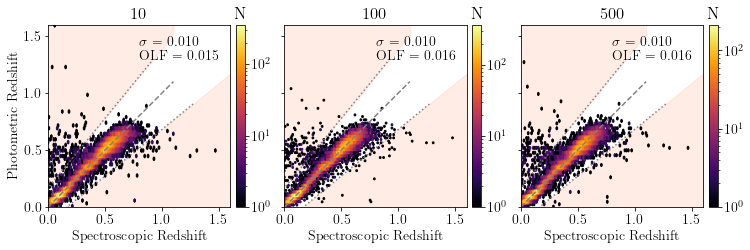

In [136]:
fig,ax = plt.subplots(1,3,figsize = (12,4),sharey=True)
zspec_lst =[]
file_zspec = open(f'gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
#file_zspec['VALUE']

for _ in range(1):
    next(file_zspec)
for line in file_zspec:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    zspec_lst.append(float(tokens[10]))
file_zspec.close()

for i,j in zip(range(len(nbf)),range(0,3)):
    

    zphot = []
    error=[]

    file = open(f'MPhys/parameter_files/gpz_{nbf[i]}_seq_cut.cat','r')
    #file = open(f'MPhys/gpz_files/gpz_jwst_base_filters_lowz.cat','r')
    for _ in range(11):
        next(file)
    for line in file:
        splitter_numbf = re.sub("\s+",",",line.strip())
        tokens_numbf = splitter_numbf.split(',')
        zphot.append(float(tokens_numbf[0]))
        error.append(float(tokens_numbf[1]))
    file.close()
    
    m=0
    k=0
    ins=[]
    delta_z=[]
    outliers=[]
    for v in range(len(zphot)):
        delta_z.append(abs(float(zphot[v])-float(zspec_lst[v])))
        outliers.append(float(delta_z[v])/(1+float(zspec_lst[v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    for k in range(len(zphot)):    
        ins.append(delta_z[k]/(1+float(zspec_lst[k])))

        if abs(outliers[k])>0.15:
            m+=1
        if abs(outliers[k])>(3*sig_nmad):
            k+=1

           # if c!=0:
    outlier_frac = m/len(zphot)
    
    err= binom_conf_interval(outlier_frac,len(zphot))
    outlier_frac_sig =k/len(zphot)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(zphot))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax[j].text(0.8, 1.5,f'$\sigma$ = {sig_nmad:.3f} \n OLF = {outlier_frac:.3f}',  fontsize=14,
        verticalalignment='top')
    
    
    
    
    x = np.linspace(np.min(zspec_lst),1.1,10)
    olf_lines = np.linspace(np.min(zspec_lst),np.max(zspec_lst),10)
    olfs_l =[]
    olfs_u=[]
    for k in range(len(olf_lines)):
        olfs_l.append(x[k]-(1+olf_lines[k])*(0.15/2))
        olfs_u.append((1+olf_lines[k])*(0.15/2)+x[k])
    #olf = (zspec_lst)*0.15
    #olf_u = x+0.15
    print(olfs_u)

    useLatex()
    ax[j].plot(x,x,color = '0.5',linestyle = '--')
    ax[j].plot(olfs_u,olfs_l,color = 'grey',linestyle = 'dotted',alpha=1)
    ax[j].plot(olfs_l,olfs_u,color = 'grey',linestyle = 'dotted',alpha=1)
    
    ax[j].set_xlabel('Spectroscopic Redshift')
    ax[0].set_ylabel('Photometric Redshift')
    ax[j].set_title(f'{nbf[i]}')
  
    #plt.title(f'{base[i]}->{filt[i]} Low Redshift Split (with size)')
    #plt.axis('equal')
    ax[j].set_aspect('equal')
    ax[j].set_xlim(0,1.6)
    ax[j].set_ylim(0,1.6)
    #cbar = plt.colorbar(label='N')
    divider = make_axes_locatable(ax[j])
    cax = divider.append_axes('right', size='5%', pad=0.075)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    cb.ax.set_title('N')
    
    points = [(olfs_u[0],olfs_l[0]),(olfs_u[-1],olfs_l[-1])]
    points_upper = [(olfs_l[0],olfs_u[0]),(olfs_l[-1],olfs_u[-1])]
    x_coords, y_coords = zip(*points)
    x_coords_upper, y_coords_upper = zip(*points_upper)
    A = vstack([x_coords,ones(len(x_coords))]).T
    A_upper = vstack([x_coords_upper,ones(len(x_coords_upper))]).T
    m, c = lstsq(A, y_coords)[0]
    m_u, c_u = lstsq(A_upper, y_coords_upper)[0]
    
    y2 = m_u*x + c_u
    xl =[0.        , 0.12777778, 0.25555556, 0.38333333, 0.51111111,
       0.63888889, 0.76666667, 0.89444444, 1.02222222, 1.15,1.6]
    y1 = m*np.array(xl) + c
   
    ax[i].fill_between(xl, 0, y1,color = 'lightsalmon',alpha=0.2)
    ax[i].fill_between(x, y2, 1.7, color = 'lightsalmon',alpha=0.2)
    im1 = ax[j].hexbin(zspec_lst, zphot,cmap = 'inferno',bins='log',mincnt=1)
plt.savefig(f'MPhys/parameter_plots/sdss_nbf_comp_seq_cut.pdf', bbox_inches='tight')
    #plt.show()
    #plt.close()
#plt.show()


# Outlier Fraction 


In [90]:
l= np.arange(0,1.2,0.1)
h=np.arange(0.4,1.2,0.1)
print(l)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


### z split

In [ ]:
for i in range(len(ls)):
    p=0
    x=[]     

    delta_z = []
    outliers = []

    logz = []
    
    
    
   # os.remove(f'MPhys/gpz_files/olf/auto/redshift_binned_olf_no_size_{ls[i]}.txt')
    file_text = open(f'MPhys/gpz_files_new/olf/size_z_split/txt_files/olf_{ls[i]}_size_zsplit.txt','a')
 
    
    highp = Table.read(f'{ext}size_z_split/highz/PRED/{pred_size_highz[i]}', format = 'ascii.commented_header')
    highp.sort('id')
    lowp =  Table.read(f'{ext}size_z_split/lowz/PRED/{pred_size_lowz[i]}', format = 'ascii.commented_header')
    lowp.sort('id')
    pred = vstack([lowp,highp])
    highcat  =Table.read(f'MPhys/gpz_files_new/cats/highz/size/{cat_size_highz[i]}',format = 'ascii')
    highcat.sort('col1')
    lowcat  =Table.read(f'MPhys/gpz_files_new/cats/lowz/size/{cat_size_lowz[i]}',format = 'ascii')
    lowcat.sort('col1')
    gpz_out= vstack([lowcat,highcat])

    

    for v in range(len(pred)):
        delta_z.append(abs(float(gpz_out['col2'][v])-float(pred['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred['z_spec'][v])))
        logz.append(np.log10(1+pred['z_spec'][v]))

    ###


    while p<len(l):
        m=0
        k=0
        c=0
        for j in range(len(logz)):

            if l[p]<=logz[j]<=l[p]+0.1:
                    #print(logz[j])
                c+=1
                x.append(delta_z[j]/(1+float(pred['z_spec'][j])))
                sig_nmad = scipy.stats.median_abs_deviation(x)
        for j in range(len(logz)):
            if l[p]<=logz[j]<=l[p]+0.1:



                if abs(outliers[j])>0.15:
                    m+=1
                if abs(outliers[j])>(3*sig_nmad):
                    k+=1

        if c!=0:
            outlier_frac = m/c
            print(outlier_frac)
            err= binom_conf_interval(outlier_frac,c)
            outlier_frac_sig =k/c
            err_three_sig= binom_conf_interval(outlier_frac_sig,c)


        file_text.write(str(l[p])+','+str(outlier_frac)+','+str(err[0])+','+str(err[1])+','+str(outlier_frac_sig)+','+str(err_three_sig[0])+','+str(err_three_sig[1])+','+str( sig_nmad)+'\n')
        p+=1
        #file_text.close()

    #####


    file_text.close()   

       # w+=1

In [ ]:

for i in range(len(ls)):
    sigs=[]
    olfs=[]
    olfs_sig=[]
    olfs_err_l=[]
    olfs_err_u=[]
    olfs_err_sig_l=[]

    olfs_err_sig_u=[]
    file = open(f'MPhys/gpz_files_new/olf/size/txt_files/olf_{ls[i]}_size.txt','r')
    #for _ in range(1):
    #    next(file)
    for line in file:

        splitter = re.sub("\s+",",",line.strip())
        tokens = splitter.split(',')

        sigs.append(float(tokens[7]))

        olfs.append(float(tokens[1]))
        olfs_err_l.append(float(tokens[2]))
        olfs_err_u.append(float(tokens[3]))

        olfs_sig.append(float(tokens[4]))
        olfs_err_sig_l.append(float(tokens[5]))
        olfs_err_sig_u.append(float(tokens[6]))
    file.close()

    x_vals = l+0.05

    fig,ax = plt.subplots(2,1,sharex=True,figsize = (7,4))
    ax[0].set_ylim(0,0.18)
    ax[1].set_ylim(0,1.2)
    useLatex()
    ax[0].errorbar(x_vals,sigs,marker = 'o',ls='none',color='navy')

    ax[1].errorbar(x_vals, olfs,yerr = (olfs_err_u,olfs_err_l),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
    ax[1].errorbar(x_vals, olfs_sig,yerr=(olfs_err_sig_u,olfs_err_sig_l),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )
    ax[0].set_ylabel(r'$\sigma_{\text{NMAD}}$')
    ax[1].set_ylabel('OLF')
    ax[1].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{spec})$')
    #ax[0].errorbar(x_vals[:3],outlier, marker='^',ls='none',color='navy',alpha =0.4 )


    #ax[0].set_title(f'Base Filters')
    ax[1].legend(loc = 'upper left',fontsize=12)
    ax[1].set_ylim(0,1.5)
    plt.savefig(f'MPhys/gpz_files_new/olf/size/{ls[i]}_olf.pdf',bbox_inches='tight')
    #plt.close()

### Regular

In [ ]:
l= np.arange(0,1.2,0.1)
for i in range(len(ls)):
    p=0
    x=[]     

    delta_z = []
    outliers = []

    logz = []
    
    
    
   # os.remove(f'MPhys/gpz_files/olf/auto/redshift_binned_olf_no_size_{ls[i]}.txt')
    file_text = open(f'MPhys/gpz_files_new/olf/size/txt_files/olf_{ls[i]}_size.txt','a')
 
    
    pred_all = Table.read(f'{ext}size/PRED/{pred_size[i]}', format = 'ascii.commented_header')
    pred_all.sort('id')
    
    gpz_out_all  =Table.read(f'MPhys/gpz_files_new/cats/all/size/{cat_size[i]}',format = 'ascii')
    gpz_out_all.sort('col1')


    

    for v in range(len(pred_all)):
        delta_z.append(abs(float(gpz_out_all['col2'][v])-float(pred_all['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred_all['z_spec'][v])))
        logz.append(np.log10(1+pred_all['z_spec'][v]))

    ###


    while p<len(l):
        m=0
        k=0
        c=0
        for j in range(len(logz)):

            if l[p]<=logz[j]<=l[p]+0.1:
                    #print(logz[j])
                c+=1
                x.append(delta_z[j]/(1+float(pred_all['z_spec'][j])))
                sig_nmad = scipy.stats.median_abs_deviation(x)
        for j in range(len(logz)):
            if l[p]<=logz[j]<=l[p]+0.1:



                if abs(outliers[j])>0.15:
                    m+=1
                if abs(outliers[j])>(3*sig_nmad):
                    k+=1

        if c!=0:
            outlier_frac = m/c
            print(outlier_frac)
            err= binom_conf_interval(outlier_frac,c)
            outlier_frac_sig =k/c
            err_three_sig= binom_conf_interval(outlier_frac_sig,c)


        file_text.write(str(l[p])+','+str(outlier_frac)+','+str(err[0])+','+str(err[1])+','+str(outlier_frac_sig)+','+str(err_three_sig[0])+','+str(err_three_sig[1])+','+str( sig_nmad)+'\n')
        p+=1
        #file_text.close()

    #####


    file_text.close()   

       # w+=1

In [17]:
top=[]
l= np.arange(0,1.2,0.1)
lnew=np.arange(0,1.2,0.2)
for i in lnew:

    top.append(10**i-1)
ys = np.linspace(0.06,0.08, len(top))
top = np.round(top,1)
ys

array([0.06 , 0.064, 0.068, 0.072, 0.076, 0.08 ])

In [4]:
sigs=[]
olfs=[]
olfs_sig=[]
olfs_err_l=[]
olfs_err_u=[]
olfs_err_sig_l=[]

olfs_err_sig_u=[]
file = open(f'MPhys/gpz_files_new/olf/size/txt_files/olf_bc_size.txt','r')
#for _ in range(1):
#    next(file)
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    sigs.append(float(tokens[7]))

    olfs.append(float(tokens[1]))
    olfs_err_l.append(float(tokens[2]))
    olfs_err_u.append(float(tokens[3]))

    olfs_sig.append(float(tokens[4]))
    olfs_err_sig_l.append(float(tokens[5]))
    olfs_err_sig_u.append(float(tokens[6]))
file.close()
####

In [5]:
sigs_zs=[]
olfs_zs=[]
olfs_sig_zs=[]
olfs_err_l_zs=[]
olfs_err_u_zs=[]
olfs_err_sig_l_zs=[]

olfs_err_sig_u_zs=[]
file = open(f'MPhys/gpz_files_new/olf/size_z_split/txt_files/olf_bc_size_zsplit.txt','r')
#for _ in range(1):
#    next(file)
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    sigs_zs.append(float(tokens[7]))

    olfs_zs.append(float(tokens[1]))
    olfs_err_l_zs.append(float(tokens[2]))
    olfs_err_u_zs.append(float(tokens[3]))

    olfs_sig_zs.append(float(tokens[4]))
    olfs_err_sig_l_zs.append(float(tokens[5]))
    olfs_err_sig_u_zs.append(float(tokens[6]))
file.close()
####

In [6]:
sigs_ns=[]
olfs_ns=[]
olfs_sig_ns=[]
olfs_err_l_ns=[]
olfs_err_u_ns=[]
olfs_err_sig_l_ns=[]

olfs_err_sig_u_ns=[]
file = open(f'MPhys/gpz_files_new/olf/reg/txt_files/olf_bc.txt','r')
#for _ in range(1):
#    next(file)
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    sigs_ns.append(float(tokens[7]))

    olfs_ns.append(float(tokens[1]))
    olfs_err_l_ns.append(float(tokens[2]))
    olfs_err_u_ns.append(float(tokens[3]))

    olfs_sig_ns.append(float(tokens[4]))
    olfs_err_sig_l_ns.append(float(tokens[5]))
    olfs_err_sig_u_ns.append(float(tokens[6]))
file.close()

In [7]:
sigs_zns=[]
olfs_zns=[]
olfs_sig_zns=[]
olfs_err_l_zns=[]
olfs_err_u_zns=[]
olfs_err_sig_l_zns=[]

olfs_err_sig_u_zns=[]
file = open(f'MPhys/gpz_files_new/olf/reg_z_split/txt_files/olf_bc.txt','r')
#for _ in range(1):
#    next(file)
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    sigs_zns.append(float(tokens[7]))

    olfs_zns.append(float(tokens[1]))
    olfs_err_l_zns.append(float(tokens[2]))
    olfs_err_u_zns.append(float(tokens[3]))

    olfs_sig_zns.append(float(tokens[4]))
    olfs_err_sig_l_zns.append(float(tokens[5]))
    olfs_err_sig_u_zns.append(float(tokens[6]))
file.close()
####

In [8]:
n=[]
cmap = plt.get_cmap('BuPu') 
for i in np.linspace(0.3,1,4): 
    n.append(cmap(i))


In [58]:
l_new_log= np.arange(0,1.2,0.2)


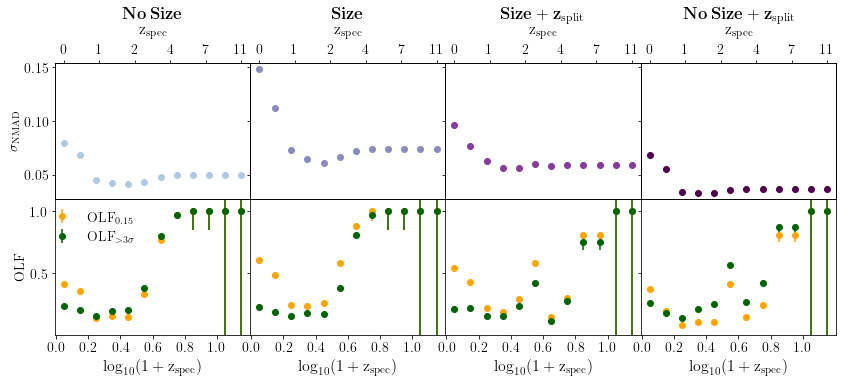

In [63]:

useLatex()
l_new= np.arange(0,1.2,0.2)

x_vals = l+0.05
new_x = l_new+0.05

zs = 10**new_x
zs_int=[0]
for i in zs[1:len(zs)]:
    zs_int.append(int(i))
#zs_int=int(zs)
# print(x_vals[:3])
# print(olfs)
# print(x_vals)
fig,ax = plt.subplots(2,4,sharex='col',sharey = 'row',figsize=(14,5))
#ax[2][1].set_visible(False)
#ax[2][0].set_visible(False)
#ax[0][0].set_ylim(0,0.18)
#ax[1][0].set_ylim(0,1.2)
#NO SIZE
ax[0][0].errorbar(x_vals,sigs_ns,marker = 'o',ls='none',color=n[0])
ax[0][0].set_title(r'$\mathbf{No\: Size}$')

ax[1][0].errorbar(x_vals, olfs_ns,yerr = (olfs_err_u_ns,olfs_err_l_ns),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
ax[1][0].errorbar(x_vals, olfs_sig_ns,yerr=(olfs_err_sig_u_ns,olfs_err_sig_l_ns),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )
ax[1][0].legend(frameon=False,loc ='upper left',bbox_to_anchor = (-0.1,1))
ax[1][0].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{\text{spec}})$',fontsize=16)
ax[1][0].set_xticks(np.round(l_new_log,1))
ax[1][0].set_xticklabels(np.round(l_new_log,1))
#SIZE
ax[0][1].errorbar(x_vals,sigs,marker = 'o',ls='none',color=n[1])
ax[0][1].set_title(r'$\mathbf{Size}$')
ax[1][1].errorbar(x_vals, olfs,yerr = (olfs_err_u,olfs_err_l),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
ax[1][1].errorbar(x_vals, olfs_sig,yerr=(olfs_err_sig_u,olfs_err_sig_l),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )
ax[1][1].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{\text{spec}})$',fontsize=16)
ax[1][1].set_xticks(np.round(l_new_log,1))
ax[1][1].set_xticklabels(np.round(l_new_log,1))
#SIZE +ZSPLIT
ax[0][2].errorbar(x_vals,sigs_zs,marker = 'o',ls='none',color=n[2])
ax[0][2].set_title(r'$\mathbf{Size+z_{\text{split}}}$')
ax[1][2].errorbar(x_vals, olfs_zs,yerr = (olfs_err_u_zs,olfs_err_l_zs),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
ax[1][2].errorbar(x_vals, olfs_sig_zs,yerr=(olfs_err_sig_u_zs,olfs_err_sig_l_zs),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )
ax[1][2].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{\text{spec}})$',fontsize=16)
ax[1][2].set_xticks(np.round(l_new_log,1))
ax[1][2].set_xticklabels(np.round(l_new_log,1))
#NO SIZE ZSPLIT
ax[0][3].errorbar(x_vals,sigs_zns,marker = 'o',ls='none',color=n[3])
ax[0][3].set_title(r'$\mathbf{No\:Size+z_{\text{split}}}$')
ax[1][3].errorbar(x_vals, olfs_zns,yerr = (olfs_err_u_zns,olfs_err_l_zns),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
ax[1][3].errorbar(x_vals, olfs_sig_zns,yerr=(olfs_err_sig_u_zns,olfs_err_sig_l_zns),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )
ax[1][3].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{\text{spec}})$',fontsize=16)
ax[1][3].set_xticks(np.round(l_new_log,1))
ax[1][3].set_xticklabels(np.round(l_new_log,1))

ax[1][0].set_ylim(0.001,1.1)

ax[0][0].set_ylabel(r'$\sigma_{\text{NMAD}}$')

ax[1][0].set_ylabel('OLF')
plt.subplots_adjust(wspace=0,hspace=0.)
#add zspec axis
ax2 = ax[0][0].twiny()
ax2.scatter(new_x,ys,color = 'none')
#ax2.set_xscale('log')
ax2.set_xticks(new_x)
ax2.set_xticklabels(zs_int)
ax2.set_xlabel(r'$\text{z}_{\text{spec}}$',labelpad=10,fontsize=16)

ax3 = ax[0][1].twiny()
ax3.scatter(new_x,ys,color = 'none')
#ax3.set_xscale('log')
ax3.set_xticks(new_x)
ax3.set_xticklabels(zs_int)
ax3.set_xlabel(r'$\text{z}_{\text{spec}}$',labelpad=10,fontsize=16)

ax4 = ax[0][2].twiny()
ax4.scatter(new_x,ys,color = 'none')
#ax4.set_xscale('log')
ax4.set_xticks(new_x)
ax4.set_xticklabels(zs_int)
ax4.set_xlabel(r'$\text{z}_{\text{spec}}$',labelpad=10,fontsize=16)

ax5 = ax[0][3].twiny()
ax5.scatter(new_x,ys,color = 'none')
#ax5.set_xscale('log')
ax5.set_xticks(new_x)
ax5.set_xticklabels(zs_int)
ax5.set_xlabel(r'$\text{z}_{\text{spec}}$',labelpad=10,fontsize=16)

plt.savefig(f'MPhys/gpz_files_new/olf/all_augs.pdf',bbox_inches='tight')
#plt.close()

## NUMBF OLF


In [250]:
numbf = [10,40,70,100,150,200,250,300,350,400,450,500]


In [251]:
zspec_sdss =[]


p=0



file_text = open(f'MPhys/gpz_files/olf/sdss_olf_cut.txt','a')
file_text.write('numbf, olf, olf_err_lower, olf_err_upper, olf_3sig, olf_3sig_err_lower, lf_3sig_err_upper, sig_nmad \n')

#for w in range(len(predfiles)):
#    print(w)
file= open(f'gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
#file_zspec['VALUE']
for _ in range(1):
    next(file)
for line in file:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    zspec_sdss.append(float(tokens[10]))
#file.close()



  

In [252]:
file= open(f'gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
#file_zspec['VALUE']
zspec_sdss =[]
for _ in range(1):
    next(file)
for line in file:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    zspec_sdss.append(float(tokens[10]))
file.close()

In [259]:
bias=[]
for nbf in numbf:
    m=0
    k=0
    delta_z_sdss= []
    outliers_sdss = []
    zphot_sdss = []
    error_sdss=[]
    x_sdss=[]

    print(nbf)
    file = open(f'MPhys/parameter_files/gpz_{nbf}_seq_cut.cat','r')
    for _ in range(11):
        next(file)
    for line in file:
        splitter_numbf = re.sub("\s+",",",line.strip())
        tokens_numbf = splitter_numbf.split(',')
        zphot_sdss.append(float(tokens_numbf[1]))
        error_sdss.append(float(tokens_numbf[2]))
    file.close()

   
    logz_sdss = []
    for i in range(len(zphot_sdss)):
        delta_z_sdss.append(float(zphot_sdss[i])-float(zspec_sdss[i])/(1+float(zspec_sdss[i])))
        #outliers_sdss.append(float(delta_z_sdss[i])/(1+float(zspec_sdss[i])))
        #logz_sdss.append(np.log10(1+zspec_sdss[i]))
        #x_sdss.append(delta_z_sdss[i]/(1+float(zspec_sdss[i])))
        
   
        #if abs(outliers_sdss[i])>0.15:
        #    m+=1
        #if abs(outliers_sdss[i])>(3*sig_nmad_sdss):
        #    k+=1


        #outlier_frac_sdss = m/len(zspec_sdss)
        #print(m)

        #err_sdss= binom_conf_interval(outlier_frac_sdss,len(zspec_sdss))
        #outlier_frac_sig_sdss =k/len(zspec_sdss)
        #err_three_sig_sdss= binom_conf_interval(outlier_frac_sig_sdss,len(zspec_sdss))

    #sig_nmad_sdss = scipy.stats.median_abs_deviation(x_sdss)
    bias.append(np.median(delta_z_sdss))
    #file_text.write(f'{nbf},'+str(outlier_frac_sdss)+','+str(err_sdss[0])+','+str(err_sdss[1])+','+str(outlier_frac_sig_sdss)+','+str(err_three_sig_sdss[0])+','+str(err_three_sig_sdss[1])+','+str( sig_nmad_sdss)+'\n')
   # p+=1


#file_text.close()   

10
40
70
100
150
200
250
300
350
400
450
500


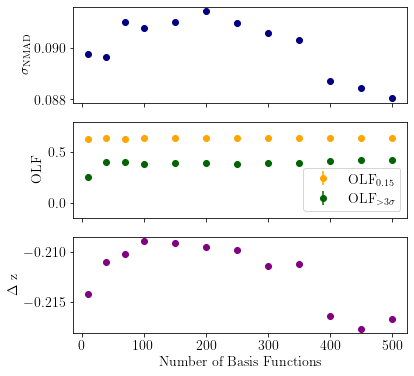

In [268]:
sigs=[]
olfs=[]
olfs_sig=[]
olfs_err_l=[]
olfs_err_u=[]
olfs_err_sig_l=[]

olfs_err_sig_u=[]

file = open('MPhys/gpz_files/olf/sdss_olf_cut.txt','r')
for _ in range(1):
    next(file)
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    sigs.append(float(tokens[7]))

    olfs.append(float(tokens[1]))
    olfs_err_l.append(float(tokens[2]))
    olfs_err_u.append(float(tokens[3]))

    olfs_sig.append(float(tokens[4]))
    olfs_err_sig_l.append(float(tokens[5]))
    olfs_err_sig_u.append(float(tokens[6]))
file.close()
####
x_vals = numbf

fig,ax = plt.subplots(3,1,sharex=True,figsize = (6,6))
ax[0].errorbar(x_vals,sigs,marker = 'o',ls='none',color='navy')

ax[1].errorbar(x_vals, olfs,yerr = (olfs_err_u,olfs_err_l),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
ax[1].errorbar(x_vals, olfs_sig,yerr=(olfs_err_sig_u,olfs_err_sig_l),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )

ax[2].errorbar(x_vals, bias,marker = 'o',color= 'purple',ls='none' )
ax[0].set_ylabel(r'$\sigma_{\text{NMAD}}$',fontsize=14)
ax[1].set_ylabel('OLF',fontsize=14)
ax[2].set_ylabel(r'$\Delta$ z',fontsize=14)
ax[2].set_xlabel('Number of Basis Functions',fontsize=14)
ax[1].set_ylim(-0.15,0.8)
#ax[2].set_ylim(-0.23,0)
#ax[0].set_title(f'Base Filters')
ax[1].legend(loc='lower right',fontsize = 14)
#plt.show()
plt.savefig(f'MPhys/olf_plots/sdss_olf.pdf',bbox_inches='tight')
#plt.close()

## Table Construction 


In [ ]:
cat = 'MPhys/gpz_files_new/cats/all/' #change from size to no_size 

In [ ]:
#not zsplit
cat_size =  [f for f in listdir('MPhys/gpz_files_new/cats/all/size') if isfile(join('MPhys/gpz_files_new/cats/all/size', f))]
cat_size.sort()

cat_no_size =  [f for f in listdir('MPhys/gpz_files_new/cats/all') if isfile(join('MPhys/gpz_files_new/cats/all', f))]
cat_no_size.sort()

size =  [f for f in listdir('MPhys/base_filter_permutations/base_filter_permutations/PRED/size') if isfile(join('MPhys/base_filter_permutations/base_filter_permutations/PRED/size', f))]
size.sort()

no_size =  [f for f in listdir('MPhys/base_filter_permutations/base_filter_permutations/PRED/no_size') if isfile(join('MPhys/base_filter_permutations/base_filter_permutations/PRED/no_size', f))]
no_size.sort()


In [ ]:
cat_size_highz


In [ ]:
os.remove('MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt')
for i in range(len(ls)):
    m=0
    k=0
    c=0
    x=[]
    outliers = []
    delta_z=[]
    ins=[]
    dz=[]
    
    file_text = open(f'MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt','a+')
    #pred_all = Table.read(f'{ext}size/PRED/new/{pred_size[i]}', format = 'ascii.commented_header')
    #pred_all.sort('id')
    #gpz_out_all  =Table.read(f'MPhys/gpz_files_new/cats/all/size/{cat_size[i]}',format = 'ascii')
    #gpz_out_all.sort('col1')
    highp = Table.read(f'{ext}size_z_split/highz/PRED/new/{pred_size_highz[i]}', format = 'ascii.commented_header')
    highp.sort('id')
    lowp =  Table.read(f'{ext}size_z_split/lowz/PRED/new/{pred_size_lowz[i]}', format = 'ascii.commented_header')
    lowp.sort('id')
    pred_all = vstack([lowp,highp])
    highcat  =Table.read(f'MPhys/gpz_files_new/cats/highz/size/{cat_size_highz[i]}',format = 'ascii')
    highcat.sort('col1')
    lowcat  =Table.read(f'MPhys/gpz_files_new/cats/lowz/size/{cat_size_lowz[i]}',format = 'ascii')
    lowcat.sort('col1')
    gpz_out_all= vstack([lowcat,highcat])
    print(len(pred_all),len(gpz_out_all))
    
    
#olf and sigma 
    for v in range(len(pred_all)):
        delta_z.append(abs(float(gpz_out_all['col2'][v])-float(pred_all['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred_all['z_spec'][v])))
        dz.append((float(pred_all['z_spec'][v])-float(gpz_out_all['col2'][v]))/(1+float(gpz_out_all['col2'][v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    bias=np.median(dz)
    for j in range(len(pred_all)):    
        ins.append(delta_z[j]/(1+float(pred_all['z_spec'][j])))
    
        if abs(outliers[j])>0.15:
            m+=1
        if abs(outliers[j])>(3*sig_nmad):
            k+=1
   
       # if c!=0:
    outlier_frac = m/len(pred_all)
    
    err= binom_conf_interval(outlier_frac,len(pred_all))
    bias_err= binom_conf_interval(bias,len(pred_all))
    outlier_frac_sig =k/len(pred_all)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(pred_all))
    print(outlier_frac)
   
    

    file_text.write(str(ls[i])+','+str(outlier_frac)+','+str(err[0])+','+str(err[1])+','+str(outlier_frac_sig)+','
                    +str(err_three_sig[0])+','+str(err_three_sig[1])+','+str( sig_nmad)+','+str(bias)+','+str(bias_err)+'\n')
file_text.close()   

    
   

In [76]:
sigs=[]
olfs=[]
olfs_sig=[]
filts=[]
olfs_err_l=[]
olfs_err_u=[]
olfs_err_sig_l=[]
olfs_err_sig_u=[]
bias=[]
file = open(f'MPhys/gpz_files_new/olf/olf_reg_av.txt','r')

for line in file:
    

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    filts.append(tokens[0])
    
    sigs.append(float(tokens[7]))
    #print(float(tokens[7]))
    olfs.append((float(tokens[1])))
    olfs_err_l.append((float(tokens[2])))
    olfs_err_u.append((float(tokens[3])))

    olfs_sig.append((float(tokens[4])))
    olfs_err_sig_l.append((float(tokens[5])))
    olfs_err_sig_u.append((float(tokens[6])))

    bias.append(float(tokens[8]))


#NO SIZE + ZSPLIT
sigs_no_size_z=[]
olfs_no_size_z=[]
olfs_sig_no_size_z=[]
olfs_no_size_z_err_l=[]
olfs_no_size_z_err_u=[]
olfs_no_size_z_err_sig_l=[]
olfs_no_size_z_err_sig_u=[]
bias_no_size_z=[]
file = open(f'MPhys/gpz_files_new/olf/olf_z_split_av.txt','r')

for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_no_size_z = splitter.split(',')
   
    olfs_no_size_z.append(float(tokens_no_size_z[1]))
    olfs_no_size_z_err_l.append(float(tokens_no_size_z[2]))
    olfs_no_size_z_err_u.append(float(tokens_no_size_z[3]))
    olfs_no_size_z_err_sig_l.append(float(tokens_no_size_z[5]))
    olfs_no_size_z_err_sig_u.append(float(tokens_no_size_z[6]))


    olfs_sig_no_size_z.append(float(tokens_no_size_z[2]))

    sigs_no_size_z.append(float(tokens_no_size_z[7]))
    bias_no_size_z.append(float(tokens_no_size_z[8]))
   
file.close()

#SIZE ONLY 
sigs_size=[]
olfs_size=[]
olfs_sig_size=[]
olfs_err_l_size=[]
olfs_err_u_size=[]
olfs_err_sig_l_size=[]
olfs_err_sig_u_size=[]
bias_size=[]
bias_size_err=[]
file = open(f'MPhys/gpz_files_new/olf/olf_size_av.txt','r')

for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_size = splitter.split(',')
   
    olfs_size.append(float(tokens_size[1]))

    olfs_sig_size.append(float(tokens_size[4]))

    sigs_size.append(float(tokens_size[7]))
    olfs_err_l_size.append(float(tokens_size[2]))
    olfs_err_u_size.append(float(tokens_size[3]))

    olfs_err_sig_l_size.append(float(tokens_size[5]))
    olfs_err_sig_u_size.append(float(tokens_size[6]))
    bias_size.append(float(tokens_size[8]))
file.close()

#SIZE + ZSPLIT

sigs_size_z=[]
olfs_size_z=[]
olfs_sig_size_z=[]
olfs_err_l_size_z=[]
olfs_err_u_size_z=[]
olfs_err_sig_l_size_z=[]
olfs_err_sig_u_size_z=[]
bias_size_z=[]
file = open(f'MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt','r')

for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_size_z = splitter.split(',')
   
    olfs_size_z.append(float(tokens_size_z[1]))

    olfs_sig_size_z.append(float(tokens_size_z[4]))

    sigs_size_z.append(float(tokens_size_z[7]))
    olfs_err_l_size_z.append(float(tokens_size_z[2]))
    olfs_err_u_size_z.append(float(tokens_size_z[3]))

    olfs_err_sig_l_size_z.append(float(tokens_size_z[5]))
    olfs_err_sig_u_size_z.append(float(tokens_size_z[6]))
    bias_size_z.append(float(tokens_size_z[8]))
file.close()


In [75]:
file = open(f'MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt','r')
bias_size_z_err_l=[]
bias_size_z_err_u=[]
for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens_size_z = splitter.split(',')
    bias_size_z_err_l.append(float(tokens_size_z[9].replace('[','')))
    bias_size_z_err_u.append(float(tokens_size_z[10].replace(']','')))
file.close()

bias_err_l=[]
bias_err_u=[]
file = open(f'MPhys/gpz_files_new/olf/olf_reg_av.txt','r')
for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    bias_err_l.append(float(tokens[9].replace('[','')))
    bias_err_u.append(float(tokens[10].replace(']','')))
    
bias_err_no_size_z_l=[]
bias_err_no_size_z_u=[]    
file.close() 
file = open(f'MPhys/gpz_files_new/olf/olf_z_split_av.txt','r')
for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens_no_size_z = splitter.split(',')
    bias_err_no_size_z_l.append(float(tokens_no_size_z[9].replace('[','')))
    bias_err_no_size_z_u.append(float(tokens_no_size_z[10].replace(']','')))
file.close()    
    
    
file = open(f'MPhys/gpz_files_new/olf/olf_size_av.txt','r')
bias_err_size_l=[]
bias_err_size_u=[]
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_size = splitter.split(',')
      
    bias_err_size_l.append(float(tokens_size[9].replace('[','')))
    bias_err_size_u.append(float(tokens_size[10].replace(']','')))
file.close()

In [77]:
n=[]
cmap = plt.get_cmap('BuPu') 
for i in np.linspace(0.3,1,4): 
    n.append(cmap(i))


In [78]:
filt_label = ['Base', 'F090W*', 'F125W', 'F140W', 'F150W', 'F160W', 'F410M**', 'F435W', 'F606W', 'F814W', 'Multi']

In [79]:
print(len(filt_label),len(sigs_size_z))
sigs_size_z

11 11


[0.059338744080866604,
 0.0517773612933633,
 0.056500082961815315,
 0.05959519565353758,
 0.057873522554134804,
 0.05831566352937177,
 0.07332337200279387,
 0.06914279650015069,
 0.058234846153701794,
 0.0662710107061318,
 0.06653194946589279]

In [ ]:
sigs

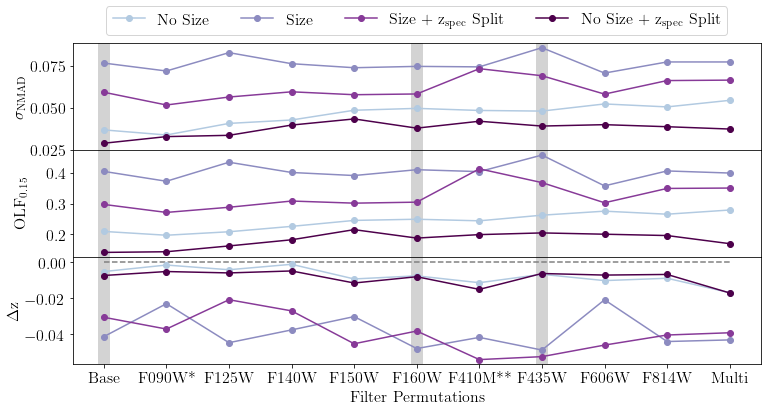

In [86]:
fig, ax = plt.subplots(3, 1,sharex=True,figsize=(11, 6))
useLatex()
plt.rcParams.update({'font.size': 16})
for i in range(3):
    ax[i].axvline(0,color = 'lightgrey',lw = 12)
    ax[i].axvline(5,color = 'lightgrey',lw = 12)
    ax[i].axvline(7,color = 'lightgrey',lw = 12)






ax[0].errorbar(filt_label, sigs, label='No Size',marker = 'o',color = n[0])
ax[0].errorbar(filt_label, sigs_size, label='Size',marker = 'o',color=n[1])
ax[0].errorbar(filt_label, sigs_size_z, label=r'Size + $\text{z}_{\text{spec}}$ Split',marker = 'o',color=n[2])
ax[0].errorbar(filt_label, sigs_no_size_z, label=r'No Size + $\text{z}_{\text{spec}}$ Split',marker = 'o',color=n[3])
ax[0].legend(frameon=True, loc='lower center', ncol=4,bbox_to_anchor =(0.5,1))
ax[0].set_yticks([0.025,0.05,0.075])
ax[0].set_ylabel(r'$\sigma_{\text{NMAD}}$',fontsize=16)
ax[1].errorbar(filt_label, olfs, yerr = (olfs_err_l,olfs_err_u),label='No Size',marker = 'o',color = n[0])
ax[1].errorbar(filt_label, olfs_size,yerr = (olfs_err_l_size,olfs_err_u_size), label='Size',marker = 'o',color = n[1])
ax[1].errorbar(filt_label, olfs_size_z,yerr = (olfs_err_sig_l_size_z,olfs_err_sig_u_size_z), label='Size with $z_{spec}$ Split',marker = 'o',color = n[2])
ax[1].errorbar(filt_label, olfs_no_size_z,yerr = (olfs_no_size_z_err_l,olfs_no_size_z_err_u), label='No Size with $z_{spec}$ Split',marker = 'o',color=n[3])
ax[1].set_ylabel(r'$\text{OLF}_{0.15}$',labelpad=18,fontsize=16)
ax[1].set_yticks([0.2,0.3,0.4])
#ax[1].set_xlabel('Filter Permutations')

ax[2].errorbar(filt_label, bias,yerr = (bias_err_l,bias_err_u), label='No Size',marker = 'o',color = n[0])
ax[2].errorbar(filt_label, bias_size,yerr = (bias_err_size_l,bias_err_size_u), label='Size',marker = 'o',color = n[1])
ax[2].errorbar(filt_label, bias_size_z,yerr = (bias_size_z_err_l,bias_size_z_err_u), label='Size with $\text{z}_{spec}$ Split',marker = 'o',color = n[2])
ax[2].errorbar(filt_label, bias_no_size_z, yerr = (bias_err_no_size_z_l,bias_err_no_size_z_u),label='No Size with $z_{spec}$ Split',marker = 'o',color=n[3])
ax[2].set_ylabel(r'$\Delta \text{z}$',fontsize=16)
ax[2].plot(filt_label,np.zeros(len(filt_label)),color='grey',linestyle='--')
ax[2].set_xlabel('Filter Permutations')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
#plt.show()
plt.savefig('MPhys/gpz_files_new/olf/sigma_olf.pdf',bbox_inches='tight')

## Cumulative Distribution Function 


In [4]:
numbf=[10,40,70,100, 150, 200, 250, 300, 350, 400, 450, 500]
cbar_label=[10,100, 200, 300,  400,  500]

In [11]:
colours=[]
cmap =  plt.get_cmap('Blues') 
for i in np.linspace(0.2,1,len(numbf)): 
    colours.append(cmap(i))


In [12]:

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
new_cmap = truncate_colormap(cmap, 0.2, 1)

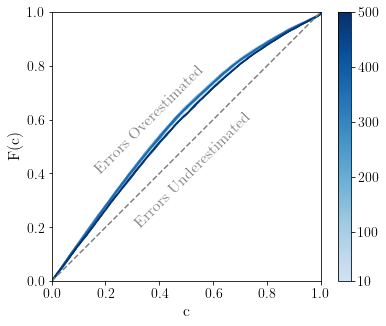

In [44]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [20, 1]},figsize=(5,4.5))
fig.tight_layout()
useLatex()

p=Table.read('gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat',format='ascii.commented_header')
spec_z=p['z_spec']



for nbf,j in zip(numbf,range(len(numbf))):
    delta_z = []
    phot_z =[]
    c=[]
    uncert=[]
    with open(f'MPhys/parameter_files/gpz_{nbf}_seq_cut.cat','r') as file:
        for _ in range(11):
            next(file)
        for line in file:
            test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
            tokens = test.split(',')
            #print(tokens[4])
            phot_z.append(float(tokens[0]))
            uncert.append(float(tokens[1]))
    file.close()
    #print(len(phot_z))
    for i in range(len(phot_z)):
        delta_z=(float(phot_z[i])-float(spec_z[i]))
        n = float(-delta_z)/(uncert[i]*np.sqrt(2))
        c.append(np.abs(math.erf(n)))

    
    ax[0].ecdf(c,color = colours[j])
x = np.linspace(0,1,10)
ax[0].plot(x,x,color='grey',linestyle='--')
ax[0].text(0.15,0.4,'Errors Overestimated', color = 'grey',rotation = 45,fontsize = '16')
ax[0].text(0.3,0.2,'Errors Underestimated', color = 'grey',rotation = 45,fontsize = '16')
ax[0].set_aspect('equal')
ax[0].set_xlabel('c',fontsize =16)
ax[0].set_ylabel('F(c)',fontsize =16)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[0].set_xticks(np.arange(0,1.2,0.2))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
norm = mpl.colors.Normalize(vmin=np.min(numbf), vmax=np.max(numbf))
cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap=new_cmap,norm=norm,orientation='vertical')
cb1.set_ticks(cbar_label)

plt.savefig('MPhys/parameter_plots/ECDF/numbf/all_nbf.pdf',bbox_inches='tight')

In [ ]:
#fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [20, 2]})
fig, ax = plt.subplots(1,1)
fig.tight_layout()
#for nbf in nbf_values:
    #sig = []
colours=[]
cmap = cm = plt.get_cmap('cool') 
for i in np.linspace(0,1,4): 
    colours.append(cmap(i))
j=0

k=0
while k<=3:
    delta_z = []
    outliers = []
    spec_z=[]
    phot_z =[]
    n=[]
    c=[]
    f=[]
    uncert=[]
##SIZE WITH ZSPLIT
    if k ==0:
        with open('MPhys/gpz_files/cats/size/zsplit/bc_s_lowz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()

        with open('MPhys/gpz_files/cats/size/zsplit/bc_s_highz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_lowz_size_base','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_highz_size_base','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

        if outliers[i]>0.15:
            j+=1
        outlier_frac = j/len(spec_z)
        sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))
        ax.ecdf(c,label = 'Size and Redshift Split',color = colours[0])
        k+=1
#NO SIZE AND ZSPLIT        
    elif k ==1:
        with open('MPhys/gpz_files/cats/no_size/zsplit/bc_ns_lowz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()

        with open('MPhys/gpz_files/cats/no_size/zsplit/bc_ns_highz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_lowz_base_choice.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_highz_base_choice.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

        if outliers[i]>0.15:
            j+=1
        outlier_frac = j/len(spec_z)
        sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))


        ax.ecdf(c,label = 'No Size and Redshift Split',color = colours[1])
        k+=1
##SIZE ONLY 
    elif k==2:
        with open('MPhys/gpz_files/cats/size/bc_s.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_filter_choice_base_size.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

            if outliers[i]>0.15:
                j+=1
            outlier_frac = j/len(spec_z)
            sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))


        ax.ecdf(c,label = 'Size Only',color=  colours[2])
   
        k+=1
    
#NO SIZE ONLY   
    elif k==3:
        with open('MPhys/gpz_files/cats/no_size/bc_ns.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_filter_choice_base.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

            if outliers[i]>0.15:
                j+=1
            outlier_frac = j/len(spec_z)
            sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))


        ax.ecdf(c,label = 'No Size',color = colours[3])
        k+=1





    
    #print(np.mean(c))
   






    #, label = f'{nbf} Base Functions', color = colours,alpha = 0.6)
    plt.legend()
    ax.set_xlabel('c')
    ax.set_ylabel('F(c)')
    #ax[1].set_ylabel('Number of Base Functions')

    #ax.set_title('Cumulative Distribution Function \n JWST Data  split')
    x = np.linspace(0,1,10)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    #norm = mpl.colors.Normalize(vmin=np.min(nbf_values), vmax=np.max(nbf_values))
    #cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap='cool',norm=norm,orientation='vertical')



    ax.plot(x,x,linestyle = '--', color = 'grey', alpha= 0.5)
  #  plt.show()
plt.savefig('MPhys/gpz_files/cdf/bc_cdf.png', bbox_inches='tight')


In [ ]:
delta_z = []
outliers = []
spec_z=[]
phot_z =[]
n=[]
c=[]
f=[]
uncert=[]
j=0
fig, ax = plt.subplots(1,1)
with open('MPhys/gpz_files/cats/size/bc_s.cat','r') as file:
        for _ in range(11):
            next(file)
        for line in file:
            test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
            tokens = test.split(',')
            #print(tokens[4])
            phot_z.append(float(tokens[1]))
            uncert.append(float(tokens[2]))
file.close()
file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_filter_choice_base_size.cat','r')


for _ in range(1):
    next(file)
for line in file:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    spec_z.append(float(tokens[4]))
file.close()
for i in range(len(phot_z)):
    delta_z.append(float(phot_z[i])-float(spec_z[i]))
    outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

    if outliers[i]>0.15:
        j+=1
    outlier_frac = j/len(spec_z)
    sig_nmad = 1.48*(np.median(outliers))

for l in range(len(delta_z)):
    n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
    c.append(np.abs(math.erf(n[l])))


ax.ecdf(c)


plt.legend()
ax.set_xlabel('c')
ax.set_ylabel('F(c)')
#ax[1].set_ylabel('Number of Base Functions')

ax.set_title('Cumulative Distribution Function \n JWST Data  split')
x = np.linspace(0,1,10)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

#norm = mpl.colors.Normalize(vmin=np.min(nbf_values), vmax=np.max(nbf_values))
#cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap='cool',norm=norm,orientation='vertical')



ax.plot(x,x,linestyle = '--', color = 'grey', alpha= 0.5)

In [ ]:


###no 
x1=[]
m=0
k=0
c=0
for j in range(len(logz)):
    if l[7]<=logz[j]<=l[7]+0.1:
        c+=1
print(c)
for j in range(len(logz)):
    if l[7]<=logz[j]<=l[7]+0.1:

        if abs(outliers[j])>0.15:
            m+=1
        #if abs(outliers[j])>(3*np.log10(error_stat[j])):
           # k+=1
        x1.append(delta_z[j]/(1+float(zspec_stat[j])))

sig_nmad = scipy.stats.median_abs_deviation(x1)
outlier_frac = m/c
print(l[7],outlier_frac,sig_nmad)

In [ ]:
sigs=[]
olfs=[]

file = open('MPhys/redshift_binned_olf.txt','r')
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    
    sigs.append(float(tokens[1]))
    olfs.append(float(tokens[2]))

In [ ]:
x_vals = l+0.05
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].scatter(x_vals,sigs,marker = 'o')
ax[1].scatter(x_vals, olfs,marker = 'o',color= 'r')
ax[0].set_ylabel('$\sigma_{NMAD}$')
ax[1].set_ylabel('$OLF_{0.15}$')
ax[1].set_xlabel('$log_{10}(1+z_{spec})$')
ax[0].set_title(f'{filt[0]} replacing {change_filt}')

# Comparison of Matrix Types



In [62]:
zspec = []
file = open('gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
for _ in range(1):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zspec.append(float(tokens_numbf[10]))
    
file.close()

In [63]:
##difference between diagonal and full covarience
zphot_full = []
error_full=[]
err_full=[]
file = open('gpzpp/gpzpp-master/example/gpvc_nbf10.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_full.append(float(tokens_numbf[0]))
   
    err_full.append(float(tokens_numbf[1]))

file.close()
for i in range(len(zspec)):
    error_full.append(err_full[i]/(1+zspec[i]))

In [64]:
##difference between diagonal and full covarience
zphot_diag = []
error_diag=[]
err_diag=[]
file = open('gpzpp/gpzpp-master/example/gpvd_nbf10.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_diag.append(float(tokens_numbf[0]))
    #for i in range(len(zspec)):
    err_diag.append(float(tokens_numbf[1]))

file.close()
for i in range(len(zspec)):
    error_diag.append(err_diag[i]/(1+zspec[i]))

In [65]:
print(len(zspec),len(zphot_diag))

18000 18000


In [76]:
highdiff_diag=[]
diff_diag=[]
highdiff_full=[]
diff_full=[]
#diagoanl
for i in range(len(zphot_diag)):
    diff_diag.append(abs(zphot_diag[i]-zspec[i]))
    #print((zphot_full[i]/100)*2)
for j in range(len(diff_diag)):
    #tst.append((zphot_diag[j]*0.02))
    if diff_diag[j]>=((1+zphot_diag[j])*0.1):
        # diff_diag[j]>0:
        highdiff_diag.append(j)
            
#full
for i in range(len(zphot_full)):
    diff_full.append(abs(zphot_full[i]-zspec[i]))
    #print((zphot_full[i]/100)*2)
for j in range(len(diff_full)):
    #tst.append((zphot_diag[j]*0.02))
    if diff_full[j]>=((1+zphot_full[j])*0.1):
        #if diff_full[j]>0:
        highdiff_full.append(j)


In [77]:
print(len(highdiff_full),len(highdiff_diag))

647 548


In [78]:
new_gpvd=[]
new_gpvd_err=[]
new_gpvc=[]
new_gpvc_err=[]
zspec_gpvd=[]
zspec_gpvc=[]
for k in highdiff_diag:
    #if k>0:
    new_gpvd.append(zphot_diag[k])
    new_gpvd_err.append(error_diag[k])
    zspec_gpvd.append(zspec[k])
for l in highdiff_full:
    #if k>0:        
    new_gpvc.append(zphot_full[l])
    new_gpvc_err.append(error_full[l])
    zspec_gpvc.append(zspec[l])

        
new_data_diag = np.array((new_gpvd,zspec_gpvd,new_gpvd_err ))
new_data_full = np.array((new_gpvc,zspec_gpvc,new_gpvc_err ))


In [81]:
print(len(new_data_diag[1]),len(new_data_full[1]))

548 647


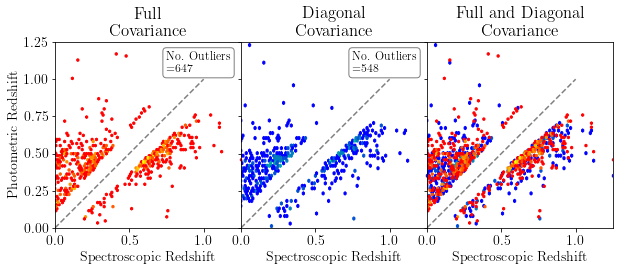

In [83]:
x = np.linspace(0,1,50)
fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
useLatex()
ax[0].hexbin(new_data_full[1] , new_data_full[0],cmap = 'autumn',bins='log')
ax[1].hexbin(new_data_diag[1] , new_data_diag[0],cmap='winter',bins='log')
ax[2].hexbin(new_data_diag[1] , new_data_diag[0],cmap='winter',bins='log',label = 'Diagonal')
ax[2].hexbin(new_data_full[1] , new_data_full[0],cmap = 'autumn',bins='log',label='Full')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')
ax[0].plot(x,x,color = 'grey',linestyle = '--')
ax[1].plot(x,x,color = 'grey',linestyle = '--')
ax[2].plot(x,x,color = 'grey',linestyle = '--')
ax[0].set_xlabel('Spectroscopic Redshift')
ax[1].set_xlabel('Spectroscopic Redshift')
ax[2].set_xlabel('Spectroscopic Redshift')
ax[0].set_ylabel('Photometric Redshift')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax[0].text(0.6, 0.95, f'No. Outliers \n ={len(new_data_full[1])}', transform=ax[0].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax[1].text(0.6, 0.95, f'No. Outliers \n ={len(new_data_diag[1])}', transform=ax[1].transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')
#fig.tight_layout(pad=0.4, w_pad=2, h_pad=1.0)
plt.ylim(0,1.25)
plt.xlim(0,1.25)
plt.subplots_adjust(wspace=0, hspace=0.)
plt.savefig('MPhys/diag_full_cov_difference_10pc_new.pdf',bbox_inches='tight')
#plt.close()
plt.show()

In [ ]:
x=np.linspace(0,np.max(new_data_full[0]),20)

fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
fig.text(0.5, 0.04, 'Spectroscopic Redshift', ha='center', va='center')
#a.set_xlabel('Spectroscopic Redshift')
ax[0].set_ylabel('Photometric Redshift')
ax[0].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
ax[1].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].plot(x,x,linestyle = '--', color = 'grey')
ax[1].plot(x,x,linestyle = '--', color = 'grey')
ax[2].plot(x,x,linestyle = '--', color = 'grey')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')

plt.xlim(0,np.max(new_data_full[1]))
plt.ylim(0,np.max(new_data_full[0]))
plt.savefig('MPhys/parameter_plots/full_vs_diag.png')

In [ ]:
from numpy import ones,vstack
from numpy.linalg import lstsq
x=np.linspace(0,1.15,10)
olf_l = x-0.15
olf_u = x+np.log10(1.5)

points = [(olf_u[0],olf_l[0]),(olf_u[19],olf_l[19])]
points_upper = [(olf_l[0],olf_u[0]),(olf_l[19],olf_u[19])]
x_coords, y_coords = zip(*points)
x_coords_upper, y_coords_upper = zip(*points_upper)
A = vstack([x_coords,ones(len(x_coords))]).T
A_upper = vstack([x_coords_upper,ones(len(x_coords_upper))]).T
m, c = lstsq(A, y_coords)[0]
m_u, c_u = lstsq(A_upper, y_coords_upper)[0]
y1 = (m*x_shade + c)+0.2
y2 = m_u*x_shade + c_u

/tmp/ipykernel_1126/2482939080.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/tmp/ipykernel_1126/2482939080.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_u, c_u = lstsq(A_upper, y_coords_upper)[0]


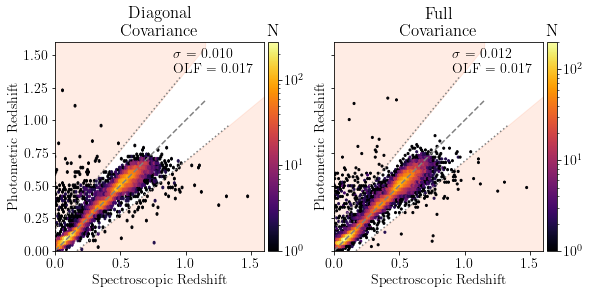

In [133]:
cov = [zphot_diag,zphot_full]
fig,ax = plt.subplots(1,2,figsize=(9,4),sharey=True)
x=np.linspace(0,1.15,10)

#olf_l = x-0.15
#olf_u = x+0.15
for i in range(len(cov)):
    m=0
    k=0
    ins=[]
    delta_z=[]
    outliers=[]
    
    olf_lines = np.linspace(np.min(zspec),np.max(zspec),10)
    olfs_l =[]
    olfs_u=[]
    for k in range(len(olf_lines)):
        olfs_l.append(x[k]-((1+olf_lines[k])*(0.15/2)))#+olf_lines[k])
        olfs_u.append(x[k]+((1+olf_lines[k])*(0.15/2)))#+olf_lines[k])
    
    for v in range(len(cov[i])):
        delta_z.append(abs(float(cov[i][v])-float(zspec[v])))
        outliers.append(float(delta_z[v])/(1+float(zspec[v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    for k in range(len(cov[i])):    
        ins.append(delta_z[k]/(1+float(zspec[k])))

        if abs(outliers[k])>0.15:
            m+=1
        if abs(outliers[k])>(3*sig_nmad):
            k+=1

           # if c!=0:
    outlier_frac = m/len(cov[i])
    
    err= binom_conf_interval(outlier_frac,len(cov[i]))
    outlier_frac_sig =k/len(cov[i])
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(cov[i]))
    
    useLatex()

    points = [(olfs_u[0],olfs_l[0]),(olfs_u[-1],olfs_l[-1])]
    points_upper = [(olfs_l[0],olfs_u[0]),(olfs_l[-1],olfs_u[-1])]
    x_coords, y_coords = zip(*points)
    x_coords_upper, y_coords_upper = zip(*points_upper)
    A = vstack([x_coords,ones(len(x_coords))]).T
    A_upper = vstack([x_coords_upper,ones(len(x_coords_upper))]).T
    m, c = lstsq(A, y_coords)[0]
    m_u, c_u = lstsq(A_upper, y_coords_upper)[0]
    
    y2 = m_u*x + c_u

    #ax1 = fig.add_subplot(121)
    
    ax[i].set_xlim(0,1.6)
    ax[i].set_ylim(0,1.6)
    ax[0].set_title('Diagonal \n Covariance')
    ax[1].set_title('Full \n Covariance')
    ax[i].plot(x,x,color='grey', linestyle='--')
    ax[i].plot(olfs_u,olfs_l,color='grey', linestyle='dotted',alpha=1)
    ax[i].plot(olfs_l,olfs_u,color='grey', linestyle='dotted',alpha=1)
    
    xl =[0.        , 0.12777778, 0.25555556, 0.38333333, 0.51111111,
       0.63888889, 0.76666667, 0.89444444, 1.02222222, 1.15,1.6]
    y1 = m*np.array(xl) + c
   
    
    ax[i].fill_between(xl, 0, y1,color = 'lightsalmon',alpha=0.2)
    ax[i].fill_between(x, y2, 1.7, color = 'lightsalmon',alpha=0.2)
   
    divider = make_axes_locatable(ax[i])
    ax[i].set_xlabel('Spectroscopic Redshift')
    ax[i].set_ylabel('Photometric Redshift ')
   
    im1 = ax[i].hexbin(zspec,cov[i],cmap = 'inferno',bins='log',mincnt=1)
    
    
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    clb1 = fig.colorbar(im1, cax=cax, orientation='vertical');
    #fig.colorbar(label ='N')
    clb1.ax.set_title('N')
    #ax2 = fig.add_subplot(122)

    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax[i].text(0.9, 1.55,f'$\sigma$ = {sig_nmad:.3f} \n OLF = {outlier_frac:.3f}',  fontsize=14,
        verticalalignment='top')
    ax[i].set_aspect('equal')
    plt.subplots_adjust(wspace=0.25, hspace=0.)
plt.savefig('MPhys/parameter_plots/covarience/comparison/comp_hexplot.pdf',bbox_inches='tight')

In [59]:
print(olfs_l)

[0.14989986, 0.17449098666666665, 0.1990821133333333, 0.22367324, 0.24826436666666668, 0.2728554933333333, 0.29744662, 0.3220377466666667, 0.34662887333333336, 0.37122]


# GMM Stats Output 

In [ ]:
sigs=[]
sigs_weight=[]
sigs_divide=[]
sigs_both=[]

nbf=[]


file = open(f'MPhys/gpz_files_new/olf/stats_file_sigma.txt','r')

for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    nbf.append(tokens[0])
    
    
    sigs.append(float(tokens[1]))
    #print(float(tokens[7]))
    sigs_weight.append((float(tokens[2])))
    sigs_divide.append((float(tokens[3])))
    sigs_both.append((float(tokens[4])))
file.close()

In [ ]:
nbf

In [ ]:
olfs=[]
olfs_weight=[]
olfs_divide=[]
olfs_both=[]

olfs_err=[]
olfs_weight_err=[]
olfs_divide_err=[]
olfs_both_err=[]
file = open(f'MPhys/gpz_files_new/olf/stats_file_olf.txt','r')

for line in file:
    
   # splitter = re.sub("\s+",",",line.strip())
    tokens = line.split(',')
   
    
    olfs.append(float(tokens[1]))
    #print(float(tokens[7]))
    olfs_weight.append((float(tokens[3])))
    olfs_divide.append((float(tokens[5])))
    olfs_both.append((float(tokens[7])))
    
    olfs_err.append(tokens[2])
    #print(float(tokens[7]))
    olfs_weight_err.append(tokens[4])
    olfs_divide_err.append(tokens[6])
    olfs_both_err.append(tokens[8])
file.close()

In [ ]:
simple_l =[]
simple_u=[]

weighted_l =[]
weighted_u=[]

divide_l =[]
divide_u=[]

both_l =[]
both_u=[]
for i in range(len(olfs_err)):
    splitter = re.sub("\s+",",",olfs_err[i].strip())
    tokens = splitter.split(',')
   # simple_l.append(tokens[0])
    simple_u.append(float(tokens[1].replace(']','')))
    simple_l.append(float(tokens[0].replace('[','')))
    
    splitter_weight = re.sub("\s+",",",olfs_weight_err[i].strip())
    tokens_weight = splitter_weight.split(',')
    weighted_l.append(float(tokens_weight[0].replace('[','')))
    weighted_u.append(float(tokens_weight[1].replace(']','')))
    
    splitter_divide = re.sub("\s+",",",olfs_divide_err[i].strip())
    tokens_divide = splitter_divide.split(',')
    divide_l.append(float(tokens_divide[0].replace('[','')))
    divide_u.append(float(tokens_divide[1].replace(']','')))
    
    splitter_both = re.sub("\s+",",",olfs_both_err[i].strip())
    tokens_both = splitter_both.split(',')
    both_l.append(float(tokens_both[0].replace('[','')))
    both_u.append(float(tokens_both[1].replace(']','')))
print(both_u)

In [ ]:
simp_dz =[]
simp_dz_err=[]


weight_dz =[]
weight_dz_err=[]


divide_dz =[]
divide_dz_err=[]


both_dz =[]
both_dz_err=[]

file = open(f'MPhys/gmm_cats/bias_nbf.txt','r')

for line in file:
    #print(line)
    tokens = line.split(',')
    #print(tokens[2])
    simp_dz.append(float(tokens[1]))
    #simp_dz_err.append(tokens[2])
    
    weight_dz.append(float(tokens[3]))
    #weight_dz_err.append(tokens[3])
    
    divide_dz.append(float(tokens[5]))
    #divide_dz_err.append(tokens[5])
    
    both_dz.append(float(tokens[7]))
    #both_dz_err.append(tokens[7])


In [201]:
s_low = Table.read('MPhys/gmm_cats/simple_stats_nbf10-100.csv',format='csv')
s_high = Table.read('MPhys/gmm_cats/simple_stats_nbf100-500.csv',format='csv')
simple = vstack([s_low,s_high])

w_low = Table.read('MPhys/gmm_cats/weight_stats_nbf10-100.csv',format='csv')
w_high = Table.read('MPhys/gmm_cats/weight_stats_nbf100-500.csv',format='csv')
weight = vstack([w_low,w_high])

divide_low = Table.read('MPhys/gmm_cats/divide_stats_nbf10-100.csv',format='csv')
divide_high = Table.read('MPhys/gmm_cats/divide_stats_nbf100-500.csv',format='csv')
divide = vstack([divide_low,divide_high])

c_low = Table.read('MPhys/gmm_cats/combined_stats_nbf10-100.csv',format='csv')
c_high = Table.read('MPhys/gmm_cats/combined_stats_nbf100-500.csv',format='csv')
combined = vstack([c_low,c_high])

In [202]:
nbf = simple['nbf']
xticks =[]
for i in nbf:
    xticks.append(int(i))
xs=np.linspace(0,500,len(nbf))


In [9]:
col=[]
cmap = plt.get_cmap('YlOrRd') 
for i in np.linspace(0.3,0.9,4): 
    col.append(cmap(i))

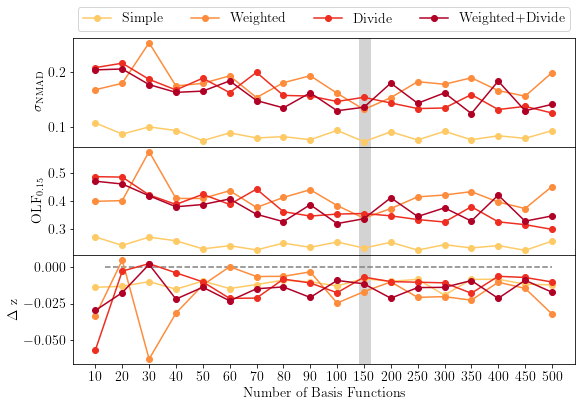

In [216]:
fig, ax = plt.subplots(3, 1,sharex=True,figsize=(9, 6))
ax[2].set_xticks(xs)
ax[2].set_xticklabels(xticks)
useLatex()

ax[0].axvline(295,color = 'lightgrey',lw = 12)
ax[1].axvline(295,color = 'lightgrey',lw = 12)
ax[2].axvline(295,color = 'lightgrey',lw = 12)


plt.rcParams.update({'font.size': 14})
ax[0].errorbar(xs, simple['sigma'], label='Simple',marker = 'o',color = col[0])
ax[0].errorbar(xs, weight['sigma'], label='Weighted',marker = 'o',color=col[1])
ax[0].errorbar(xs, divide['sigma'], label='Divide',marker = 'o',color=col[2])
ax[0].errorbar(xs, combined['sigma'], label='Weighted+Divide',marker = 'o',color=col[3])
ax[0].legend(frameon=True, loc='lower center', ncol=4,bbox_to_anchor =(0.5,1),fontsize=14)
ax[0].set_ylabel(r'$\sigma_{\rm{NMAD}}$',fontsize=14)
plt.rcParams.update({'font.size': 14})
ax[1].errorbar(xs, simple['olf'] ,label='Simple',marker = 'o',color = col[0])
ax[1].errorbar(xs, weight['olf'], label='Weighted',marker = 'o',color = col[1])
ax[1].errorbar(xs, divide['olf'], label='Divide',marker = 'o',color = col[2])
ax[1].errorbar(xs, combined['olf'], label='Weighted+Divide',marker = 'o',color=col[3])
ax[1].set_ylabel(r'$\text{OLF}_\text{0.15}$',fontsize=14)
plt.rcParams.update({'font.size': 14})
ax[2].errorbar(xs, simple['bias'], label='Simple',marker = 'o',color = col[0])
ax[2].errorbar(xs,weight['bias'], label='Weighted',marker = 'o',color=col[1])
ax[2].errorbar(xs,divide['bias'], label='Divide',marker = 'o',color=col[2])
ax[2].errorbar(xs,combined['bias'], label='Weighted+Divide',marker = 'o',color=col[3])
ax[2].set_ylabel(r'$\Delta$ z',fontsize=14)
ax[2].plot(nbf,np.zeros(len(nbf)),color='grey',linestyle='--')
ax[2].set_xlabel('Number of Basis Functions',fontsize=14)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
plt.savefig('MPhys/gpz_files_new/olf/primer_nbf_olf_gmm.pdf')
plt.show()

# GMM Features Stats


In [13]:
gmm = Table.read('MPhys/gmm_cats/stats_table_bc.fits',format='fits')
gmm.sort('permutation')
x = gmm['permutation']
xticks_gmm =[0,]
for i in x:
    xticks_gmm.append(int(i))
xs_gmm=np.arange(0,15,1)
xs_gmm

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [14]:
new_perms = [ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]

In [15]:
gmm

permutation,kl,kl_weight,simp_sig,simp_sig_weight,weight_sig,weight_sig_weight,div_sig,div_sig_weight,comb_sig,comb_sig_weight,simp_olf,simp_olf_weight,weight_olf,weight_olf_weight,div_olf,div_olf_weight,comb_olf,comb_olf_weight,simp_bias,simp_bias_weight,weight_bias,weight_bias_weight,div_bias,div_bias_weight,comb_bias,comb_bias_weight
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,1.987269090331937,0.20818654030415482,0.088,0.311,0.177,0.43,0.158,0.406,0.126,0.382,0.224,0.61,0.4,0.704,0.379,0.723,0.311,0.654,-0.018,-0.052,-0.029,0.06,-0.019,0.048,-0.001,0.019
2,1.9554547784208172,0.1903969918060653,0.088,0.322,0.175,0.353,0.171,0.435,0.139,0.395,0.224,0.62,0.408,0.624,0.4,0.737,0.347,0.687,-0.018,-0.046,-0.011,0.031,-0.007,0.046,-0.015,0.073
3,1.921275088973231,0.19260273780463433,0.088,0.312,0.136,0.499,0.146,0.414,0.174,0.357,0.224,0.61,0.342,0.758,0.364,0.695,0.408,0.647,-0.018,-0.05,-0.012,0.055,-0.023,0.09,-0.019,0.033
4,1.659329311823565,0.17575943389080306,0.098,0.267,0.145,0.267,0.141,0.281,0.153,0.262,0.277,0.553,0.34,0.575,0.334,0.573,0.373,0.555,-0.011,-0.005,-0.009,0.049,-0.012,0.023,-0.021,-0.009
5,0.5546299625649946,0.20062362056336913,0.088,0.238,0.134,0.221,0.144,0.184,0.15,0.21,0.224,0.508,0.356,0.501,0.354,0.453,0.371,0.476,-0.018,0.03,-0.029,0.029,-0.045,0.007,-0.053,0.017
6,6.605492774259538,2.7289959529261045,0.088,0.298,0.201,0.241,0.105,0.155,0.125,0.188,0.224,0.6,0.46,0.522,0.288,0.417,0.31,0.451,-0.018,-0.0,-0.062,0.004,-0.019,-0.003,-0.022,0.017
7,2.3841515027111235,0.5057402326046585,0.143,0.395,0.224,0.418,0.228,0.517,0.208,0.438,0.345,0.7,0.515,0.682,0.521,0.75,0.498,0.687,-0.031,-0.106,-0.041,0.012,-0.051,0.082,-0.075,0.027
8,0.6906405060053671,0.19108593288739154,0.142,0.306,0.248,0.312,0.178,0.255,0.186,0.244,0.367,0.61,0.559,0.61,0.42,0.548,0.433,0.53,-0.038,-0.022,-0.066,-0.022,-0.042,-0.001,-0.043,0.007
9,2.470901530246932,0.39952254080092,0.157,0.377,0.211,0.503,0.213,0.394,0.189,0.419,0.394,0.703,0.545,0.789,0.488,0.661,0.456,0.704,-0.026,-0.029,-0.075,0.069,-0.046,0.017,-0.044,0.067


In [19]:
gmm.write('MPhys/gmm_cats/stats_table_bc.fits',format='fits',overwrite=True)

In [16]:
p1= mpatches.Patch(color='none')#, label='1 = (F200W-F356W), (F356W-F444W),F200W')

#handles, labels = plt.gca().get_legend_handles_labels()
handles=[p1]*14

 # add new patches and labels to list
l1=r'\textbf{1 = (F200W-F356W), (F356W-F444W),F200W}'
l2='2 = (F200W-F356W), (F356W-F444W),F356W'
l3='3 = (F200W-F356W), (F356W-F444W),F444W'
l4 ='4 = (F200W-F356W), (F356W-F444W),F115W'
l5=r'\textbf{5 = (F115W-F200W), (F200W-F356W),(F356W-F444W)}'
l6='6 = F115W, F200W, F356W, F444W'
l7='7 = (F200W-F356W), (F356W-F444W),F200W, F444W Size'
l8='8 = (F200W-F356W), (F356W-F444W), F444W Size'
l9='9 = (F200W-F356W), (F356W-F444W),F200W, F356W Size'
l10='10 = (F200W-F356W), (F356W-F444W), F356W Size'
l11='11 = (F200W-F356W), (F356W-F444W),F200W, F200W Size'
l12='12 = (F200W-F356W), (F356W-F444W),F200W Size'
l13='13 = (F200W-F356W), (F356W-F444W),F200W, FX Size'
l14='14 = (F200W-F356W), (F356W-F444W),F115W Size'
labels=[l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14]

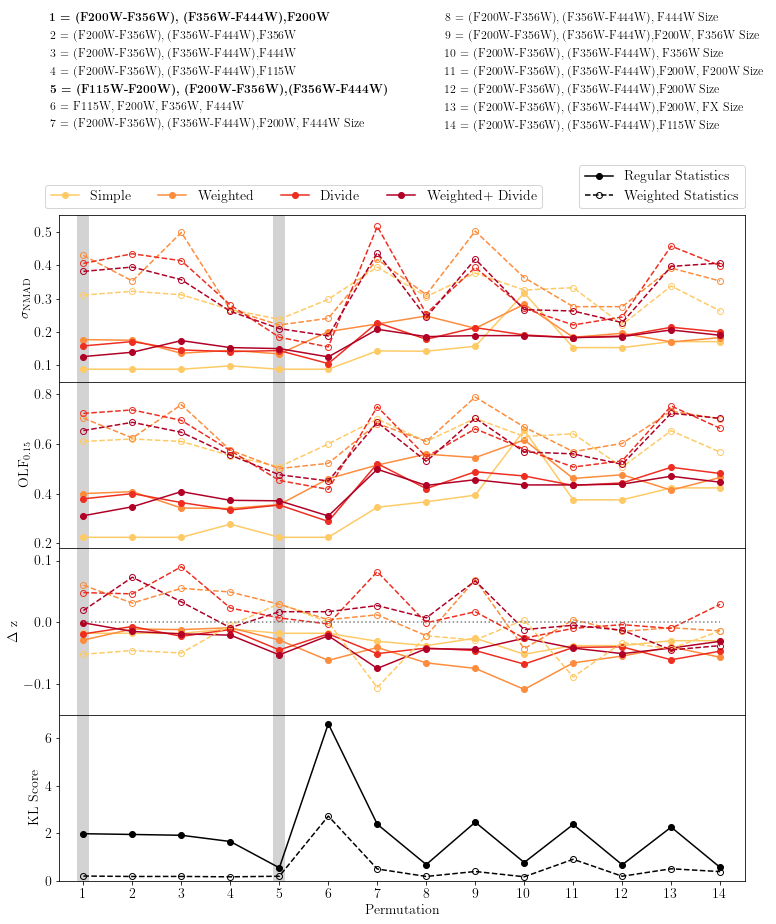

In [19]:
fig, ax = plt.subplots(4,1,figsize=(10.5,10),sharex=True)
fig.tight_layout()
plt.rcParams.update({'font.size': 14})
ax[0].axvline(1,color = 'lightgrey',lw = 12)
ax[1].axvline(1,color = 'lightgrey',lw = 12)
ax[2].axvline(1,color = 'lightgrey',lw = 12)
ax[3].axvline(1,color = 'lightgrey',lw = 12)

ax[0].axvline(5,color = 'lightgrey',lw = 12)
ax[1].axvline(5,color = 'lightgrey',lw = 12)
ax[2].axvline(5,color = 'lightgrey',lw = 12)
ax[3].axvline(5,color = 'lightgrey',lw = 12)

ax[0].plot(x,gmm['simp_sig'],marker = 'o',color = col[0],label = 'Simple')
ax[0].plot(x,gmm['weight_sig'],marker = 'o',color = col[1],label = 'Weighted')
ax[0].plot(x,gmm['div_sig'],marker = 'o',color = col[2],label = 'Divide')
ax[0].plot(x,gmm['comb_sig'],marker = 'o',color = col[3],label = 'Weighted+ Divide')

ax[0].plot(x,gmm['simp_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color=col[0])
ax[0].plot(x,gmm['weight_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
ax[0].plot(x,gmm['div_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
ax[0].plot(x,gmm['comb_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])

ax[1].plot(x,gmm['simp_olf'],marker = 'o',color = col[0])
ax[1].plot(x,gmm['weight_olf'],marker = 'o',color = col[1])
ax[1].plot(x,gmm['div_olf'],marker = 'o',color = col[2])
ax[1].plot(x,gmm['comb_olf'],marker = 'o',color = col[3])

ax[1].plot(x,gmm['simp_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[0])
ax[1].plot(x,gmm['weight_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
ax[1].plot(x,gmm['div_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
ax[1].plot(x,gmm['comb_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])

ax[2].plot(x,gmm['simp_bias'],marker = 'o',color = col[0])
ax[2].plot(x,gmm['weight_bias'],marker = 'o',color = col[1])
ax[2].plot(x,gmm['div_bias'],marker = 'o',color = col[2])
ax[2].plot(x,gmm['comb_bias'],marker = 'o',color = col[3])

ax[2].plot(x,gmm['simp_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[0])
ax[2].plot(x,gmm['weight_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
ax[2].plot(x,gmm['div_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
ax[2].plot(x,gmm['comb_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])
ax[2].plot(x,np.zeros(len(x)),color='grey',linestyle='dotted')

ax[3].plot(x,gmm['kl'],marker = 'o',color = 'k',label = 'Regular Statistics')
ax[3].plot(x,gmm['kl_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = 'k',label = 'Weighted Statistics')

ax[0].legend(frameon=True, loc='lower left', ncol=4,bbox_to_anchor =(-0.03,1),fontsize=14)
ax[3].legend(frameon=True, loc='lower right', ncol=1,bbox_to_anchor =(1.01,4),fontsize=14)

ax[0].set_ylabel(r'$\sigma_{\rm{NMAD}}$',fontsize=14)
ax[1].set_ylabel(r'$\text{OLF}_\text{0.15}$',fontsize=14)
ax[2].set_ylabel(r'$\Delta$ z',fontsize=14)
ax[3].set_ylabel('KL Score',fontsize=14)

ax[3].set_xlabel('Permutation')
ax[3].set_xticks(xs_gmm)
ax[3].set_xticklabels(xticks_gmm)
ax[3].set_xlim(0.5,14.5)

ax[0].set_ylim(0.05,0.55)
ax[1].set_ylim(0.18,0.85)
ax[2].set_ylim(-0.15,0.12)
ax[3].set_ylim(0,6.99)

plt.subplots_adjust(wspace=0, hspace=0)



fig.legend(handles, labels,loc = 'upper center',bbox_to_anchor = (0.5,1.27),frameon=False,fontsize=12,ncol=2,edgecolor ='papayawhip',facecolor = 'papayawhip',framealpha=0.5)
plt.savefig('MPhys/gmm_cats/plots/ALL_STATS_WEIGHTED_bc.pdf',bbox_inches='tight')

# NSplits GMM

In [75]:
ns_simple = Table(names=('N','sig','sig_w','olf','olf_w'))
ns_weight = Table(names=('N','sig','sig_w','olf','olf_w'))
ns_divide = Table(names=('N','sig','sig_w','olf','olf_w'))
ns_both = Table(names=('N','sig','sig_w','olf','olf_w'))

In [ ]:
ns_divide.add_row((10,0.114,0.372,0.277,0.632))

In [ ]:
ns_both

In [ ]:
ns_divide.write('MPhys/gmm_cats/nsplit_divide_stats.cat',format = 'ascii.commented_header',overwrite=True)

In [4]:
ns_simple = Table.read('MPhys/gmm_cats/nsplit_simple_stats.cat',format = 'ascii.commented_header')
ns_weight = Table.read('MPhys/gmm_cats/nsplit_weight_stats.cat',format = 'ascii.commented_header')
ns_divide = Table.read('MPhys/gmm_cats/nsplit_divide_stats.cat',format = 'ascii.commented_header')
ns_both = Table.read('MPhys/gmm_cats/nsplit_both_stats.cat',format = 'ascii.commented_header')

In [5]:
ns_simple.sort('N')
ns_divide.sort('N')
ns_weight.sort('N')
ns_both.sort('N')



In [6]:
ns_simple=ns_simple[2:len(ns_simple)]
ns_weight=ns_weight[2:len(ns_weight)]
ns_divide=ns_divide[2:len(ns_divide)]
ns_both=ns_both[2:len(ns_both)]


In [7]:
bics = Table.read('MPhys/gmm_cats/bics_table.csv',format='csv')


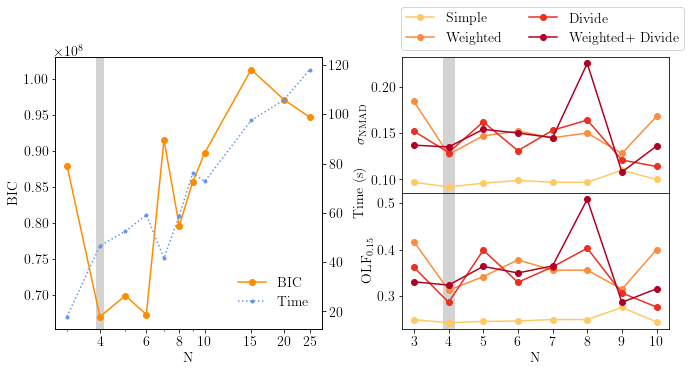

In [12]:
#fig, ax = plt.subplots(2, 2,sharex=True,figsize=(9, 6))
#ax[2].set_xticks(xs)
#ax[2].set_xticklabels(xticks)
fig, ax= plt.subplot_mosaic([['left','upper right'],
                               ['left','lower right']],
                              figsize=(11,5))
useLatex()
ax['upper right'].axvline(4,color = 'lightgrey',lw = 12)
ax['lower right'].axvline(4,color = 'lightgrey',lw = 12)

ns= ns_simple['N']


ax['upper right'].plot(ns,ns_simple['sig'],marker = 'o',color = col[0],label = 'Simple')
ax['upper right'].plot(ns,ns_weight['sig'],marker = 'o',color = col[1],label = 'Weighted')
ax['upper right'].plot(ns,ns_divide['sig'],marker = 'o',color = col[2],label = 'Divide')
ax['upper right'].plot(ns,ns_both['sig'],marker = 'o',color = col[3],label = 'Weighted+ Divide')

#ax[0].plot(ns,ns_simple['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color=col[0])
#ax[0].plot(ns,ns_weight['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
#ax[0].plot(ns,ns_divide['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
#ax[0].plot(ns,ns_both['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])

ax['lower right'].plot(ns,ns_simple['olf'],marker = 'o',color = col[0],label = 'Simple')
ax['lower right'].plot(ns,ns_weight['olf'],marker = 'o',color = col[1],label = 'Weighted')
ax['lower right'].plot(ns,ns_divide['olf'],marker = 'o',color = col[2],label = 'Divide')
ax['lower right'].plot(ns,ns_both['olf'],marker = 'o',color = col[3],label = 'Weighted+ Divide')

#ax[1].plot(ns,ns_simple['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color=col[0])
#ax[1].plot(ns,ns_weight['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
#ax[1].plot(ns,ns_divide['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
#ax[1].plot(ns,ns_both['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])

ax['upper right'].sharex(ax['lower right'])
ax['upper right'].legend(frameon=True, loc='lower left', ncol=2,bbox_to_anchor =(-0.03,1),fontsize=14)
ax['upper right'].set_ylabel(r'$\sigma_{\rm{NMAD}}$',fontsize=14)
ax['lower right'].set_ylabel(r'$\text{OLF}_\text{0.15}$',fontsize=14)
ax['lower right'].set_xlabel('N')
plt.subplots_adjust(wspace=0.3, hspace=0)

ax['left'].axvline(4,color = 'lightgrey',lw = 8)
ax['left'].plot(bics['N'][2:len(bics)],bics['BIC_pop'][2:len(bics)],marker = 'o',color = 'darkorange',label = 'BIC')

ax['left'].set_ylabel('BIC',fontsize=14)
ax['left'].set_xlabel('N',fontsize=14)
ax['left'].set_xscale('log')
ax2 = ax['left'].twinx()
ax2.set_ylabel('Time (s)',fontsize=14)
ax2.plot(bics['N'][2:len(bics)],bics['time'][2:len(bics)],marker = '.',linestyle= 'dotted',color ='cornflowerblue' ,label='Time')
ax['left'].legend(loc = 'lower left',bbox_to_anchor =(0.64,0.1),frameon=False)
ax2.legend(loc = 'lower left',bbox_to_anchor =(0.64,0.03),frameon=False)
#plt.xticks(bics['N'][2:len(bics)])
xticks =[4,6,8,10,15,20,25]
ax['left'].set_xticks(xticks, labels = xticks)
xticks_left=[3,4,5,6,7,8,9,10]
ax['lower right'].set_xticks(xticks_left, labels = xticks_left)

#ax['right'].set_xticklabels(xticks)

#plt.show()
#plt.savefig('MPhys/gmm_cats/plots/N_choice_lines_BIC_inc.pdf',bbox_inches='tight')
#ax[1].legend(frameon=True, loc='lower right', ncol=1,bbox_to_anchor =(1.01,4.54),fontsize=14)

# Angular Diameter Plot

In [6]:
#from astropy.cosmology import WMAP9 as cosmo
#cosmo.arcsec_per_kpc_proper(3)\
from astropy.cosmology import FlatLambdaCDM as cosmo
>>> cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

zs = np.linspace(0,20,100)
ang_dia=np.zeros(len(zs))
for i in range(len(zs)):
    ang_dia[i]=cosmo.angular_diameter_distance(zs[i]).value


In [7]:
for i in range(len(zs)):
    if ang_dia[i]==np.max(ang_dia):
        peak = zs[i]
print(peak)

1.6161616161616161


In [8]:
#galaxy size evolution
nlow=np.zeros(len(zs))
nmed=np.zeros(len(zs))
nhigh=np.zeros(len(zs))
for i in range(len(zs)):
    nlow[i] = 11.68*(1+zs[i])**-0.97
    nmed[i] = 6.27*(1+zs[i])**-0.92
    nhigh[i] = 3.10*(1+zs[i])**-0.80

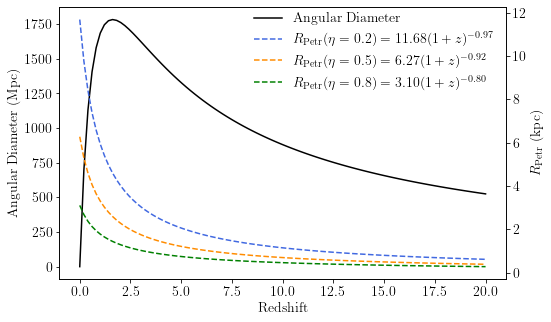

In [10]:
useLatex()
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(zs,ang_dia,color = 'k',label = 'Angular Diameter')
#plt.axvline(peak,linestyle='--',color ='grey')
ax2 = ax.twinx()
ax2.plot(zs,nlow,color='royalblue',label = r'$R_{\text{Petr}}(\eta = 0.2)=11.68(1+z)^{-0.97}$' ,linestyle = '--')
ax2.plot(zs,nmed,color = 'darkorange',label = r'$R_{\text{Petr}}(\eta = 0.5)=6.27(1+z)^{-0.92}$',linestyle = '--')
ax2.plot(zs,nhigh,color = 'green',label = r'$R_{\text{Petr}}(\eta = 0.8)=3.10(1+z)^{-0.80}$',linestyle = '--')
ax2.set_ylabel(r'$R_{\text{Petr}}$ (kpc)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular Diameter (Mpc)')
fig.legend(frameon=False, loc='upper right',bbox_to_anchor =(0.9,0.9))
plt.savefig('MPhys/angular_dia_plot.pdf',bbox_inches ='tight')
#plt.show

# Data Release Runs

In [13]:
os.mkdir('MPhys/data_release/plots')

In [6]:
t = Table.read('MPhys/data_release/gpz_output/bc_phot.cat', format='ascii')
pred =  Table.read('MPhys/data_release/gpz_input/bc_pred.cat', format='ascii.commented_header')
eazy = Table.read('MPhys/data_release/select_bc_filters_eazy_output.fits',format='fits')

In [106]:
print((eazy['z_l95'][500]+eazy['z_u95'][500])/2)
print(eazy['z_p50'][500])
print(len(eazy))

0.30026131868362427
0.3346552
14274


In [7]:
from numpy import ones,vstack
from numpy.linalg import lstsq
x_shade = np.linspace(0,1.2,20)
olf_l = x_shade-np.log10(1.5)
olf_u = x_shade+np.log10(1.5)

points = [(olf_u[0],olf_l[0]),(olf_u[19],olf_l[19])]
points_upper = [(olf_l[0],olf_u[0]),(olf_l[19],olf_u[19])]
x_coords, y_coords = zip(*points)
x_coords_upper, y_coords_upper = zip(*points_upper)
A = vstack([x_coords,ones(len(x_coords))]).T
A_upper = vstack([x_coords_upper,ones(len(x_coords_upper))]).T
m, c = lstsq(A, y_coords)[0]
m_u, c_u = lstsq(A_upper, y_coords_upper)[0]
y1 = (m*x_shade + c)+0.2
y2 = m_u*x_shade + c_u


/tmp/ipykernel_8436/4204219338.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/tmp/ipykernel_8436/4204219338.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_u, c_u = lstsq(A_upper, y_coords_upper)[0]


In [4]:
x_shade = np.linspace(0,1.2,20)
olf_l = x_shade-0.15
olf_u = x_shade+np.log10(1.5)

points = [(olf_u[0],olf_l[0]),(olf_u[19],olf_l[19])]
points_upper = [(olf_l[0],olf_u[0]),(olf_l[19],olf_u[19])]
x_coords, y_coords = zip(*points)
x_coords_upper, y_coords_upper = zip(*points_upper)
A = vstack([x_coords,ones(len(x_coords))]).T
A_upper = vstack([x_coords_upper,ones(len(x_coords_upper))]).T
m, c = lstsq(A, y_coords)[0]
m_u, c_u = lstsq(A_upper, y_coords_upper)[0]
y1 = (m*x_shade + c)+0.2
y2 = m_u*x_shade + c_u

/tmp/ipykernel_415726/2300040609.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/tmp/ipykernel_415726/2300040609.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_u, c_u = lstsq(A_upper, y_coords_upper)[0]


/tmp/ipykernel_415726/4243331366.py:23: RuntimeWarning: invalid value encountered in log10
  im1 = ax[0].hexbin(np.log10(1+pred['z_spec']),np.log10(1+t['col2']),cmap = 'inferno',bins='log')
/tmp/ipykernel_415726/4243331366.py:24: RuntimeWarning: divide by zero encountered in log10
  im2 = ax[1].hexbin(np.log10(1+eazy['z_spec']),np.log10(1+eazy['z_best']),cmap = 'inferno',bins='log')


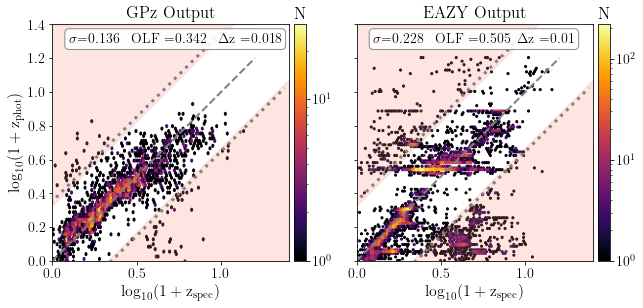

In [8]:
fig,ax = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
useLatex()
stats=calcStats(t['col2'],pred['z_spec'])
stats_eazy = calcStats(eazy['z_best'],eazy['z_spec'])
x = np.linspace(0,1.2,20)

props = dict(boxstyle='round', facecolor='white', alpha=0.9,edgecolor='grey')
ax[0].text(0.1, 1.35,f'$\sigma$={np.round(stats[0],3)} \: OLF ={np.round(stats[2],3)} \: $\Delta$z ={np.round(stats[3],3)}',  fontsize=14,
    verticalalignment='top',bbox=props)
ax[1].text(0.1, 1.35,f'$\sigma$={np.round(stats_eazy[0],3)} \: OLF ={np.round(stats_eazy[2],3)}\: $\Delta$z ={np.round(stats_eazy[3],3)}',  fontsize=14,
    verticalalignment='top',bbox=props)
# print(outlier_frac)
ax[0].plot(x,x,color = 'grey',linestyle = '--',lw=2)
ax[1].plot(x,x,color = 'grey',linestyle = '--',lw=2)

ax[0].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{\text{spec}})$',fontsize=16)
ax[1].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{\text{spec}})$',fontsize=16)
ax[0].set_ylabel(r'$\text{log}_{10}(1+\text{z}_{\text{phot}})$',fontsize=16)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].set_xlim(0,1.4)
ax[0].set_ylim(0,1.4)
im1 = ax[0].hexbin(np.log10(1+pred['z_spec']),np.log10(1+t['col2']),cmap = 'inferno',bins='log')
im2 = ax[1].hexbin(np.log10(1+eazy['z_spec']),np.log10(1+eazy['z_best']),cmap = 'inferno',bins='log')

ax[0].set_title('GPz Output')
ax[1].set_title('EAZY Output')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.075)
cb = fig.colorbar(im1, cax=cax, orientation='vertical')
cb.ax.set_title('N')

divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.075)
cb1 = fig.colorbar(im2, cax=cax1, orientation='vertical')
cb1.ax.set_title('N')
olf_l = x-np.log10(1.5)
olf_u = x+np.log10(1.5)
lower_s = [olf_u,olf_l]

for i in range(2):

    ax[i].plot(olf_l,olf_u,color='grey', linestyle='dotted',lw=3)
    test = ax[i].plot(olf_u,olf_l,color='grey', linestyle='dotted',lw=3)
    
    ax[i].fill_between(x_shade+0.2, 0, y1,color = 'salmon',alpha=0.2)
    ax[i].fill_between(x_shade, y2, 1.4, color = 'salmon',alpha=0.2)
#ax[0].axhline(0.5,0,0.3,color = 'g')
#plt.savefig('MPhys/data_release/plots/eazy_gpz_comp_hexplot.pdf',bbox_inches='tight')

In [73]:
olf_lines = np.linspace(np.min(pred['z_spec']),np.max(pred['z_spec']),20)
x = np.linspace(0,1.2,20)

In [79]:

olfs_l =[]
olfs_u=[]
for k in range(len(olf_lines)):
    olfs_l.append(x[k]-((1+np.log10(olf_lines[k]))*(0.15/2)))#+olf_lines[k])
    olfs_u.append(x[k]+((1+np.log10(olf_lines[k]))*(0.15/2)))#+olf_lines[k])
points=[(olfs_l[0],olfs_u[0]),(olfs_l[19],olfs_u[19])]
points_upper=[(olfs_u[0],olfs_u[0]),(olfs_u[19],olfs_u[19])]
x_coords, y_coords = zip(*points)
x_coords_upper, y_coords_upper = zip(*points_upper)
A = vstack([x_coords,ones(len(x_coords))]).T
A_upper = vstack([x_coords_upper,ones(len(x_coords_upper))]).T
m, c = lstsq(A, y_coords)[0]
m_u, c_u = lstsq(A_upper, y_coords_upper)[0]
y1 = (m*olf_lines + c)+0.2
y2 = m_u*olf_lines + c_u


/tmp/ipykernel_8436/3304764016.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/tmp/ipykernel_8436/3304764016.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_u, c_u = lstsq(A_upper, y_coords_upper)[0]


In [47]:
#l= np.arange(0,1.3,0.1)

p=0
x=[]     

delta_z = []
outliers = []
d_sub=[]
logz = []



os.remove(f'MPhys/data_release/bc_olf_not_log.txt')
file_text = open(f'MPhys/data_release/bc_olf_not_log.txt','a')






for v in range(len(pred)):
    delta_z.append(abs(float(t['col2'][v])-float(pred['z_spec'][v])))
    outliers.append(float(delta_z[v])/(1+float(pred['z_spec'][v])))
    logz.append(pred['z_spec'][v])
   # logz.append(np.log10(1+pred['z_spec'][v]))

###


while p<len(z):
   
    m=0
    k=0
    c=0
   
    for j in range(len(logz)):
        
        if z[p]<=logz[j]<=z[p]+0.1:
                #print(logz[j])
            c+=1
            d_sub.append(delta_z[j])
            
            x.append(delta_z[j]/(1+float(pred['z_spec'][j])))
            
            sig_nmad = scipy.stats.median_abs_deviation(x)
    bias =np.median(d_sub)       
    for j in range(len(logz)):
        if z[p]<=logz[j]<=z[p]+0.1:
            
            if abs(outliers[j])>0.15:
                m+=1
            if abs(outliers[j])>(3*sig_nmad):
                k+=1
           # means.append(0.001*(1+np.mean(log))

    if c!=0:
        outlier_frac = m/c
        print(z[p],outlier_frac)
        err= binom_conf_interval(outlier_frac,c)
        outlier_frac_sig =k/c
        err_three_sig= binom_conf_interval(outlier_frac_sig,c)

    
    file_text.write(str(z[p])+','+str(outlier_frac)+','+str(err[0])+','+str(err[1])+','+str(outlier_frac_sig)+','+str(err_three_sig[0])+','+str(err_three_sig[1])+','+str( sig_nmad)+','+str(bias)+'\n')
    print(bias)
    #file_text.close()
    p+=1
#####
   # print(len(l))

file_text.close()   

   # w+=1

NameError: name 'z' is not defined

In [134]:
top=[]
for i in space:

    top.append(10**i-1)
ys = np.linspace(0.06,0.08, len(top))
top = np.round(top,1)
top

array([ 0. ,  0.3,  0.6,  1. ,  1.5,  2.2,  3. ,  4. ,  5.3,  6.9,  9. ,
       11.6, 14.8])

In [48]:
sigs=[]
olfs=[]
olfs_sig=[]
olfs_err_l=[]
olfs_err_u=[]
olfs_err_sig_l=[]

olfs_err_sig_u=[]
bias=[]
file = open('MPhys/data_release/bc_olf_not_log.txt','r')
#for _ in range(1):
#    next(file)
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    sigs.append(float(tokens[7]))

    olfs.append(float(tokens[1]))
    olfs_err_l.append(float(tokens[2]))
    olfs_err_u.append(float(tokens[3]))

    olfs_sig.append(float(tokens[4]))
    olfs_err_sig_l.append(float(tokens[5]))
    olfs_err_sig_u.append(float(tokens[6]))
    bias.append(float(tokens[8]))
file.close()
####
x_vals = z
useLatex()
fig,ax1= plt.subplots(3,1,sharex=True,figsize = (7,6))
ax1[0].errorbar(x_vals,sigs,marker = 'o',ls='none',color='navy')

ax1[1].errorbar(x_vals, olfs,yerr = (olfs_err_u,olfs_err_l),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
ax1[1].errorbar(x_vals, olfs_sig,yerr=(olfs_err_sig_u,olfs_err_sig_l),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )

ax1[2].errorbar(x_vals, bias,marker = 'o',color= 'purple',ls='none' )
ax1[0].set_ylabel(r'$\sigma_{\text{NMAD}}$',fontsize=14)
ax1[1].set_ylabel('OLF',fontsize=14)
ax1[2].set_ylabel(r'$\Delta$ z',fontsize=14)
ax1[2].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{\text{spec}})$',fontsize=14)

ax1[1].legend(loc='upper left',fontsize = 14)
plt.subplots_adjust(wspace=0,hspace=0)

ax1[0].set_ylim(0.025,0.12)
ax1[1].set_ylim(0,1.2)
ax1[2].set_ylim(0.07,0.22)



#ax2 = ax1[0].twiny()
#ax2.scatter(top,ys,color = 'none')
#ax2.set_xscale('log')
#ax2.set_xticks(top)
#ax2.set_xticklabels(np.arange(0,13,1))
#ax2.set_xlabel(r'$\text{z}_{\text{spec}}$',labelpad=10,fontsize=14)
#plt.savefig(f'MPhys/data_release/plots/bc_olf_plots.pdf',bbox_inches='tight')
#plt.close()

NameError: name 'z' is not defined

In [50]:
t1 = Table.read('MPhys/data_release/gpz_output/bc_phot.cat', format='ascii')
p1 =  Table.read('MPhys/data_release/gpz_input/bc_pred.cat', format='ascii.commented_header')
t2 = Table.read('MPhys/data_release/gpz_output/f435w_phot.cat', format='ascii')
p2 =  Table.read('MPhys/data_release/gpz_input/f435w_pred.cat', format='ascii.commented_header')
t3 = Table.read('MPhys/data_release/gpz_output/f160w_phot.cat', format='ascii')
p3 =  Table.read('MPhys/data_release/gpz_input/f160w_pred.cat', format='ascii.commented_header')

In [51]:
t=[t1,t2,t3]
p=[p1,p2,p3]
labels=['Base','F435W','F160W']



In [52]:
col=[]
cmap = plt.get_cmap('BuPu') 
for i in np.linspace(0.5,1,3): 
    col.append(cmap(i))

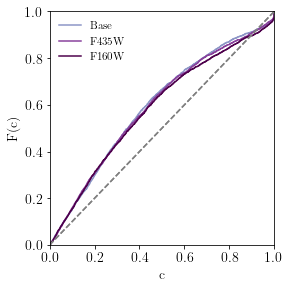

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
fig.tight_layout()
useLatex()
for j in range(len(t)):
    #delta_z = []
    phot_z = t[j]['col2']
    spec_z = p[j]['z_spec']
    c=[]
    c_corr=[]
    uncert=t[j]['col3']
    #uncert_corr=aug['uncertainty']*0.71
    
    #print(len(phot_z))
    for i in range(len(phot_z)):
        delta_z=(float(phot_z[i])-float(spec_z[i]))
        n = float(-delta_z)/(uncert[i]*np.sqrt(2))
        c.append(np.abs(math.erf(n)))
       # n_corr = float(-delta_z)/(uncert_corr[i]*np.sqrt(2))
       # c_corr.append(np.abs(math.erf(n_corr)))

    
    ax.ecdf(c,color = col[j],label= labels[j])
    #ax[1].ecdf(c_corr,color = col[j])
x = np.linspace(0,1,10)
ax.plot(x,x,color='grey',linestyle='--')
ax.set_xlabel('c')
ax.set_xlabel('c')
ax.plot(x,x,color='grey',linestyle='--')

ax.legend(frameon=False,loc = 'upper left',fontsize = 11)

ax.set_ylabel('F(c)')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#ax[1].set_xlim(0,1)
#ax[1].set_ylim(0,1)http://localhost:8888/notebooks/plot_making.ipynb#
#ax[0].set_title('Raw')
#ax[1].set_title('Corrected')

#plt.subplots_adjust(wspace=0., hspace=0)

#ax[0].set_xticks(np.arange(0,1,0.2))
#ax[1].set_xticks(np.arange(0,1.2,0.2))
plt.show()
#plt.savefig('MPhys/gmm_cats/plots/cdf_augs_base_feat_filt.pdf',bbox_inches='tight')

In [56]:
phots = [eazy['z_best'],t['col2']]
specs=[eazy['z_spec'],pred['z_spec']]
err = [eazy['z_p50'],t['col3']]
labels=['EAZY','GPz']

In [57]:
col=[]
cmap = plt.get_cmap('tab10') 
for i in np.linspace(0,0.1,2): 
    col.append(cmap(i))

/tmp/ipykernel_1126/837413001.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  n = float(-delta_z)/(uncert[i]*np.sqrt(2))


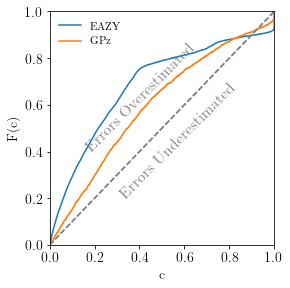

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
fig.tight_layout()
useLatex()
for j in range(len(specs)):
    #delta_z = []
    phot_z = phots[j]
    spec_z = specs[j]
    c=[]
    c_corr=[]
    uncert=err[j]
    #uncert_corr=aug['uncertainty']*0.71
    
    #print(len(phot_z))
    for i in range(len(phot_z)):
        delta_z=(float(phot_z[i])-float(spec_z[i]))
        n = float(-delta_z)/(uncert[i]*np.sqrt(2))
        c.append(np.abs(math.erf(n)))
       # n_corr = float(-delta_z)/(uncert_corr[i]*np.sqrt(2))
       # c_corr.append(np.abs(math.erf(n_corr)))

    
    ax.ecdf(c,color = col[j],label= labels[j])
    #ax[1].ecdf(c_corr,color = col[j])
x = np.linspace(0,1,10)
ax.plot(x,x,color='grey',linestyle='--')
ax.set_xlabel('c')
ax.set_xlabel('c')
ax.plot(x,x,color='grey',linestyle='--')
ax.text(0.15,0.4,'Errors Overestimated', color = 'grey',rotation = 45,fontsize = '16')
ax.text(0.3,0.2,'Errors Underestimated', color = 'grey',rotation = 45,fontsize = '16')
ax.legend(frameon=False,loc = 'upper left',fontsize = 11)

ax.set_ylabel('F(c)')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.savefig('MPhys/data_release/plots/eazy_gpz_comp_cdf.pdf',bbox_inches='tight')
plt.show()